In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.vector_ar.var_model import VAR
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller



x = pd.read_csv('AMZN.csv', parse_dates=['Date'], index_col='Date')
y = pd.read_csv('AMZN.csv')

### Stats and Graphs

In [167]:
x.describe(include='all')

,Open,High,Low,Close,Adj Close,Volume
count,5156.000000,5156.000000,5156.000000,5156.000000,5156.000000,5.156000e+03
mean,412.480012,417.027921,407.579679,412.586231,412.586231,6.496816e+06
std,599.028697,605.434429,592.132443,599.284174,599.284174,5.133389e+06
min,5.910000,6.100000,5.510000,5.970000,5.970000,8.813000e+05
25%,41.187499,41.967500,40.362501,41.157500,41.157500,3.625700e+06
50%,128.815002,130.230004,126.805001,128.790001,128.790001,5.384100e+06
75%,431.122490,435.292511,428.010002,430.997490,430.997490,7.758150e+06
max,3251.060059,3344.290039,3135.699951,3200.000000,3200.000000,1.043292e+08


No handles with labels found to put in legend.


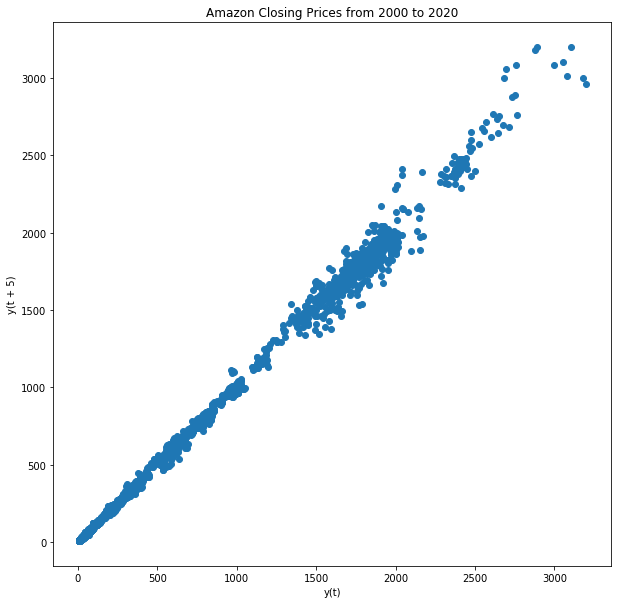

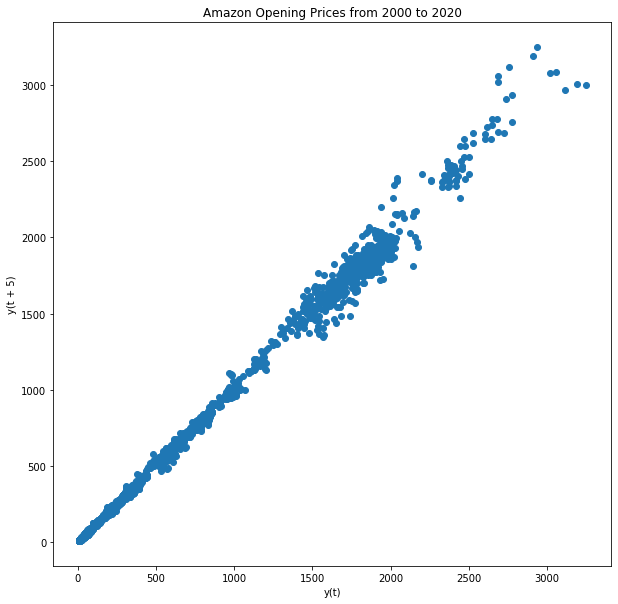

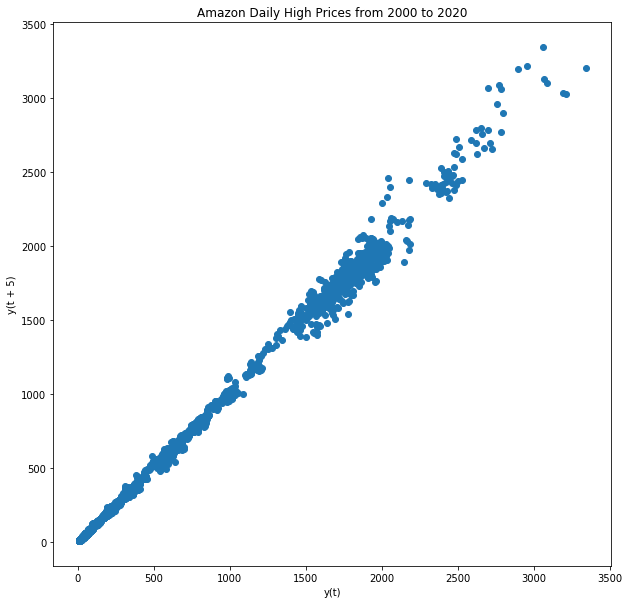

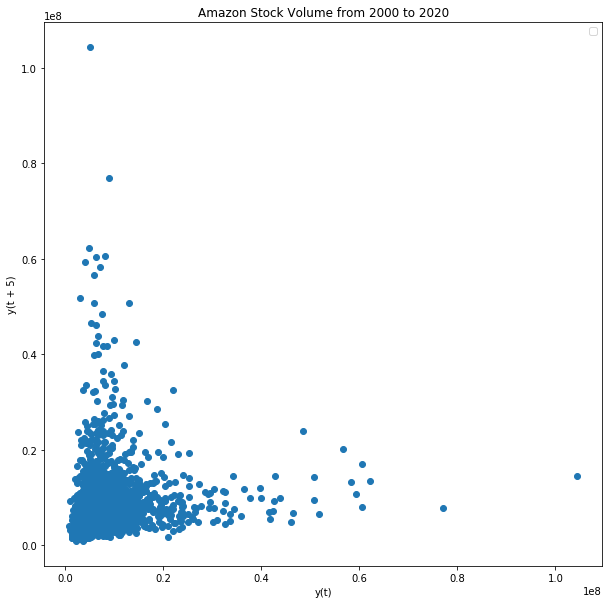

In [188]:
plt.figure(figsize=(10,10))
plt.title('Amazon Closing Prices from 2000 to 2020')
plt.ylabel('Closing Prices')
plt.xlabel('Date')
lag_plot(x['Close'], lag=5)




plt.figure(figsize=(10,10))
plt.title('Amazon Opening Prices from 2000 to 2020')
plt.ylabel('Opening Prices')
plt.xlabel('Date')
lag_plot(x['Open'], lag=5)

plt.figure(figsize=(10,10))
plt.title('Amazon Daily High Prices from 2000 to 2020')
plt.ylabel('Daily High Prices')
plt.xlabel('Date')
lag_plot(x['High'], lag=5)

plt.figure(figsize=(10,10))
plt.title('Amazon Stock Volume from 2000 to 2020')
plt.ylabel('Volume')
plt.xlabel('Date')
lag_plot(x['Volume'], lag=5)
plt.legend()


# Preprocess Data

In [190]:
# Split set into training and test

# Since the closing price of a stock determines profit or loss, it will be our main target

# split data into 2 sets -> Training Set (80% of total data), Test Set (20 % of total data)

num_rows = x.shape[0]      # Get total number of rows
total_splitter = int(num_rows * .80)    # Get 20% of total number of rows

total_train, total_test = x[:total_splitter], x[total_splitter:]

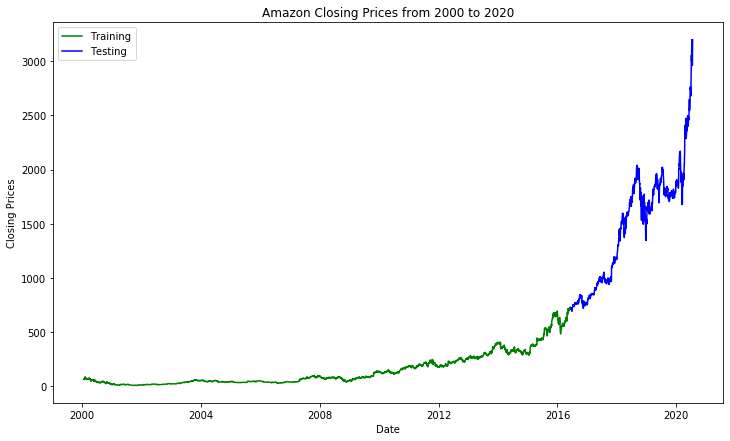

In [192]:
plt.figure(figsize=(12,7))
plt.title('Amazon Closing Prices from 2000 to 2020')
plt.ylabel('Closing Prices')
plt.xlabel('Date')
plt.plot(total_train['Close'], 'green', label='Training')
plt.plot(total_test['Close'], 'blue', label='Testing')
plt.legend()

# ARIMA

In [193]:
arima_training = total_train['Close'].values
arima_testing= total_test['Close'].values


historical_closing_prices = [x for x in arima_training]
pred = []
for i in range(len(arima_testing)):
    model = ARIMA(historical_closing_prices, order=(5,1,0))
    fit = model.fit(disp=0)
    output = fit.forecast()
    model_prediction = output[0]
    pred.append(model_prediction)
    observation = arima_testing[i]
    historical_closing_prices.append(observation)



In [194]:
print('MSE', mean_squared_error(arima_testing, pred, squared=False))

# Formula retrieved from https://wiki2.org/en/Symmetric_mean_absolute_percentage_error
def smape(true, pred):
    return np.mean((np.abs(pred - true) * 200/ (np.abs(pred) +  np.abs(true))))


print('Symmetric Mean Absolute Percentage Error', smape(arima_testing, pred))

MSE 31.893497820994607
Symmetric Mean Absolute Percentage Error 40.64638820512227


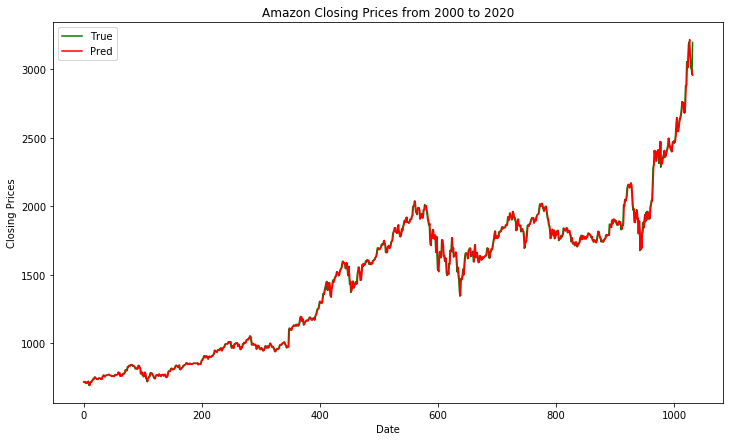

In [197]:
plt.figure(figsize=(12,7))
plt.title('Amazon Closing Prices from 2000 to 2020')
plt.ylabel('Closing Prices')
plt.xlabel('Date')
plt.plot(arima_testing, 'green', label='True')
plt.plot(pred, 'red', label='Pred')
plt.legend()

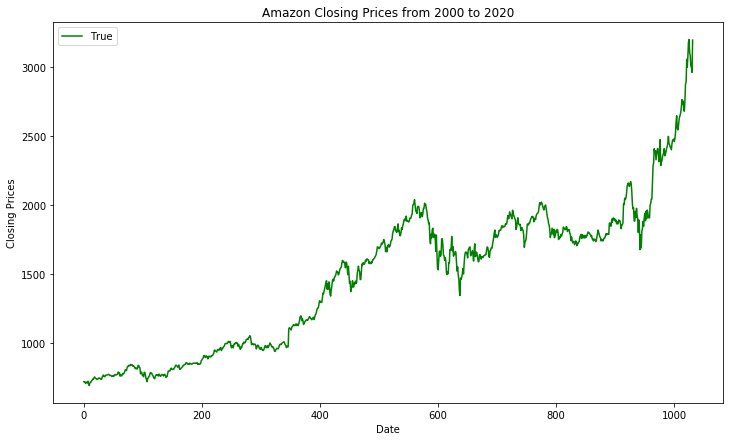

In [198]:
plt.figure(figsize=(12,7))
plt.title('Amazon Closing Prices from 2000 to 2020')
plt.ylabel('Closing Prices')
plt.xlabel('Date')
plt.plot(arima_testing, 'green', label='True')
plt.legend()

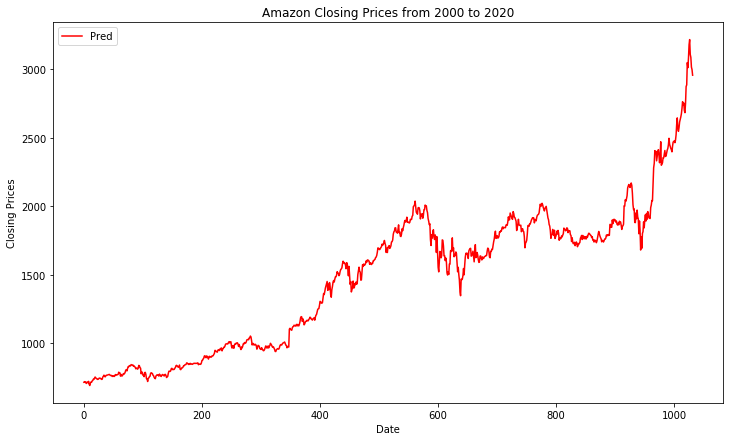

In [199]:
plt.figure(figsize=(12,7))
plt.title('Amazon Closing Prices from 2000 to 2020')
plt.ylabel('Closing Prices')
plt.xlabel('Date')
plt.plot(pred, 'red', label='Pred')
plt.legend()

# Sarima

In [200]:
x_diff = total_train.diff().dropna()
y_diff = total_test.diff().dropna()

sarima_training = total_train['Close']
sarima_testing= total_test['Close']

In [201]:
sarima = sm.tsa.statespace.SARIMAX(sarima_training, order=(0,1,1)).fit(max_iter=50, method='powell')

Optimization terminated successfully.
         Current function value: 2.938782
         Iterations: 1
         Function evaluations: 24


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [203]:
sarima_training = total_train['Close'].values
sarima_testing= total_test['Close'].values


historical_closing_prices = [x for x in arima_training]
pred = []
for i in range(len(sarima_testing)):
    sarima = sm.tsa.statespace.SARIMAX(historical_closing_prices, order=(5,1,0))
    fit = sarima.fit(disp=0)
    output = fit.forecast()
    sarima_pred = output[0]
    pred.append(sarima_pred)
    observation = sarima_testing[i]
    historical_closing_prices.append(observation)
    

In [204]:
print('MSE', mean_squared_error(sarima_testing, pred, squared=False))

print('Symmetric Mean Absolute Percentage Error', smape(sarima_testing, pred))

MSE 31.91639587515317
Symmetric Mean Absolute Percentage Error 1.2507452130075207


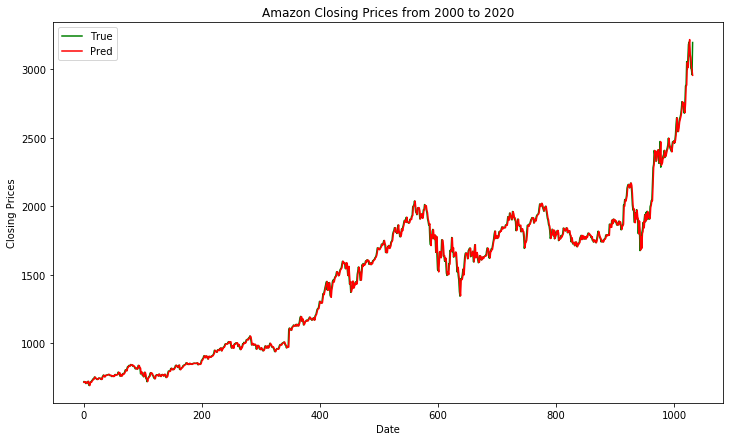

In [205]:
plt.figure(figsize=(12,7))
plt.title('Amazon Closing Prices from 2000 to 2020')
plt.ylabel('Closing Prices')
plt.xlabel('Date')
plt.plot(sarima_testing, 'green', label='True')
plt.plot(pred, 'red', label='Pred')
plt.legend()

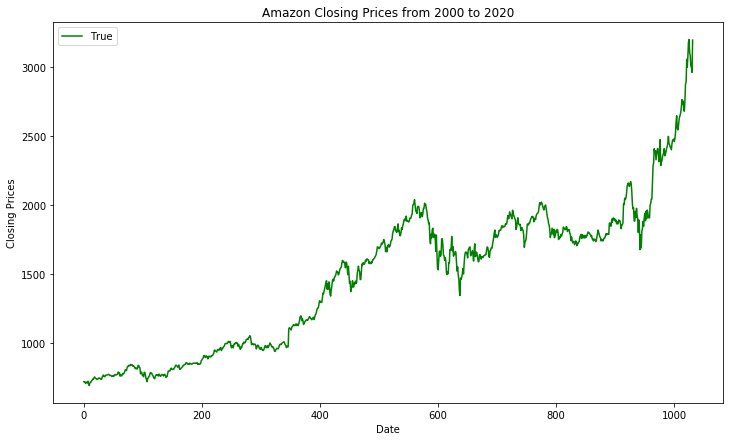

In [206]:
plt.figure(figsize=(12,7))
plt.title('Amazon Closing Prices from 2000 to 2020')
plt.ylabel('Closing Prices')
plt.xlabel('Date')
plt.plot(sarima_testing, 'green', label='True')
plt.legend()

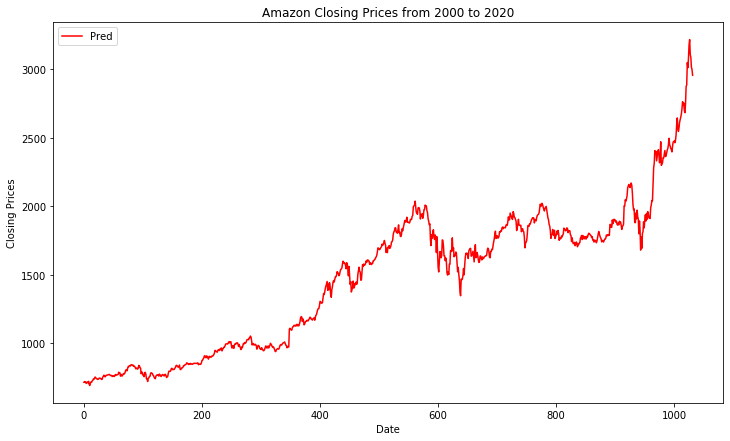

In [207]:
plt.figure(figsize=(12,7))
plt.title('Amazon Closing Prices from 2000 to 2020')
plt.ylabel('Closing Prices')
plt.xlabel('Date')
plt.plot(pred, 'red', label='Pred')
plt.legend()

# Vector Autoregression

In [208]:
# Check if time series is stationary
sig = .05

for c in total_train:

    adf = adfuller(total_train[c], autolag='AIC')

    if(adf[1] < sig):
        print('TRUE')
    else:
        print('FALSE')

FALSE
FALSE
FALSE
FALSE
FALSE
TRUE


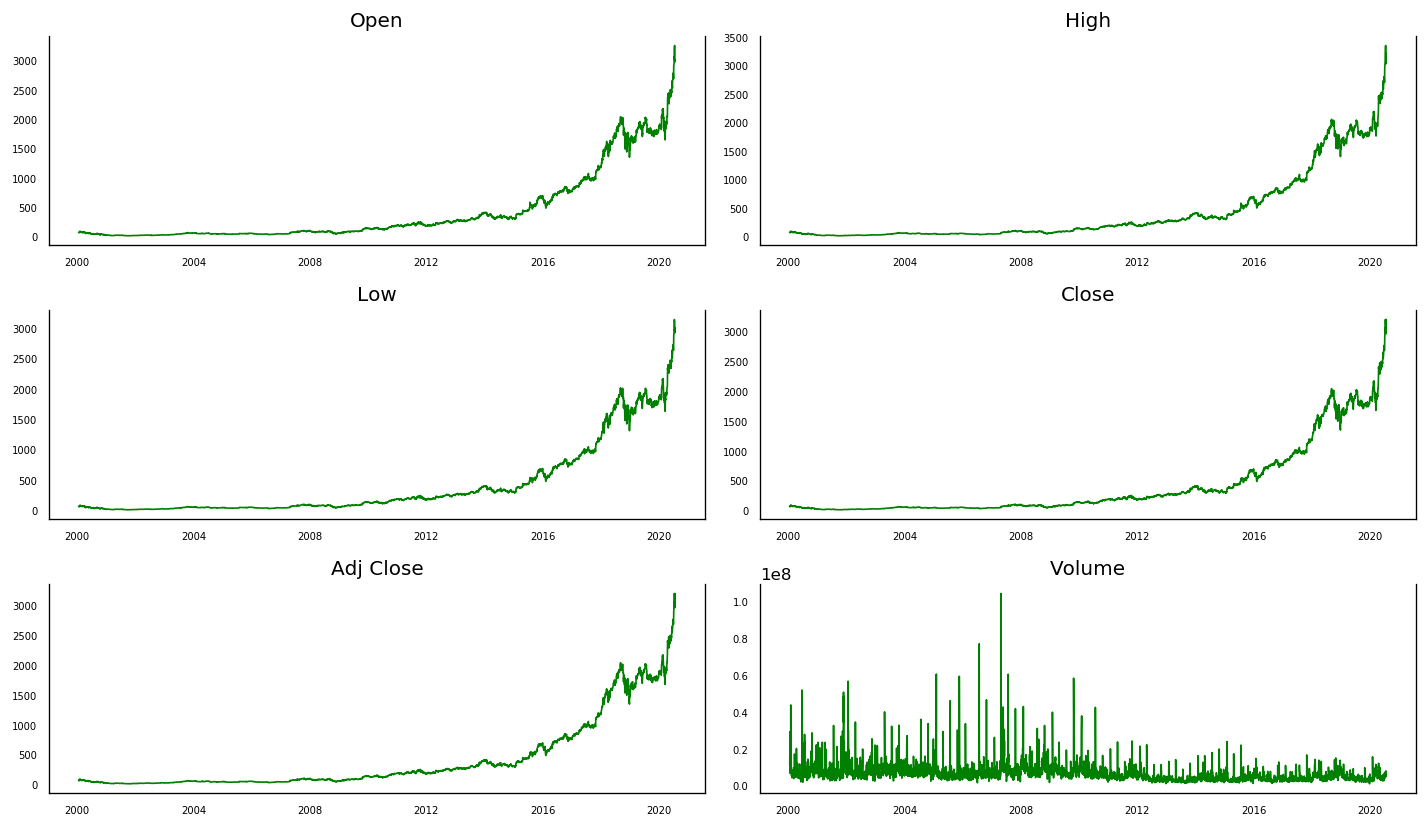

In [209]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(12,7))
for i, ax in enumerate(axes.flatten()):
    data = x[x.columns[i]]
    ax.plot(data, color='green', linewidth=1)
    ax.set_title(x.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [210]:
num_rows = x.shape[0]      # Get total number of rows
total_splitter = 400
total_train, total_test = x[0:-total_splitter], x[-total_splitter:]


In [211]:
# Make time series stationary by getting difference
x_diff = total_train.diff().dropna()

In [212]:
# Check if all time series are now stationary
for c in x_diff:
    adf = adfuller(x_diff[c], autolag='AIC')

    if(adf[1] < sig):
        print('TRUE')
    else:
        print('FALSE')

TRUE
TRUE
TRUE
TRUE
TRUE
TRUE


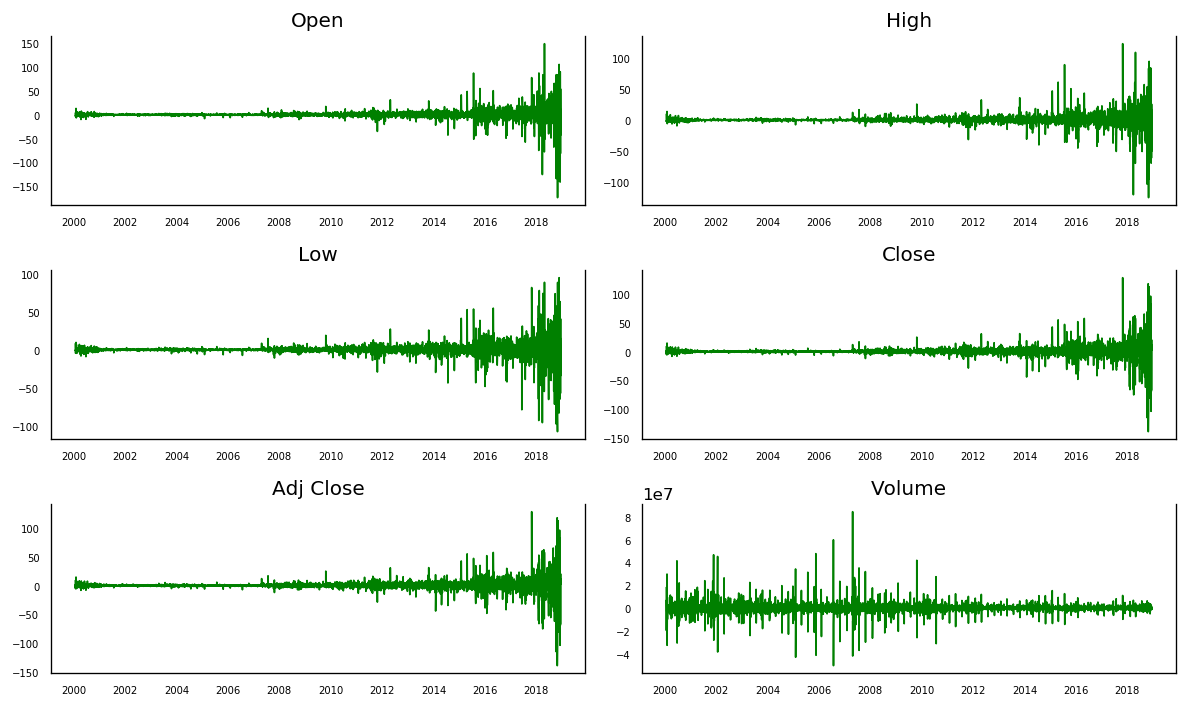

In [213]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = x_diff[x_diff.columns[i]]
    ax.plot(data, color='green', linewidth=1)
    ax.set_title(x.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [215]:
# Var Model on stationary time series

var = VAR(x_diff)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [216]:
# best so far is 550
fit = var.fit(550)

In [217]:
lag = fit.k_ar

In [218]:
forecast = x_diff.values[-lag:]

In [219]:
forecasting = fit.forecast(y=forecast, steps=total_splitter)
new_forecast = pd.DataFrame(forecasting, index=x.index[-total_splitter:], columns=x.columns + '_1d') # only took difference once
new_forecast

,Open_1d,High_1d,Low_1d,Close_1d,Adj Close_1d,Volume_1d
Date,,,,,,
2018-12-17,-55.078693,-51.045687,-53.007323,-69.516278,-69.516278,1.837389e+07
2018-12-18,-35.525086,-23.854312,-20.140669,6.967686,6.967686,-7.259840e+06
2018-12-19,56.869675,46.031971,42.127057,50.174995,50.174995,1.038295e+07
2018-12-20,14.008039,37.122694,73.955091,67.911257,67.911257,2.290292e+07
2018-12-21,-13.850085,-50.770686,-43.854701,-34.274407,-34.274407,-6.597573e+07
...,...,...,...,...,...,...
2020-07-14,-482.716851,-594.500842,224.447558,-277.194793,-277.194793,-4.597642e+08
2020-07-15,527.588096,139.000219,-370.239061,-414.572645,-414.572644,4.340514e+08
2020-07-16,-943.748837,-287.811208,-69.830288,434.326266,434.326266,-2.939813e+08


In [223]:
def back(training, forecast):
    forecast = forecast.copy()
    columns = training.columns
    for col in columns:        
        forecast[str(col)+'-forecasted'] = training[col].iloc[-1] + forecast[str(col)+'_1d'].cumsum()
    return forecast

In [224]:
res = back(total_train, new_forecast)        
res.loc[:, ['Open-forecasted', 'High-forecasted', 'Low-forecasted', 'Close-forecasted',
                   'Adj Close-forecasted', 'Volume-forecasted']]


,Open-forecasted,High-forecasted,Low-forecasted,Close-forecasted,Adj Close-forecasted,Volume-forecasted
Date,,,,,,
2018-12-17,1582.921307,1591.524259,1531.992677,1522.393756,1522.393756,2.474109e+07
2018-12-18,1547.396220,1567.669947,1511.852009,1529.361442,1529.361442,1.748124e+07
2018-12-19,1604.265895,1613.701917,1553.979066,1579.536437,1579.536437,2.786420e+07
2018-12-20,1618.273934,1650.824612,1627.934157,1647.447694,1647.447694,5.076712e+07
2018-12-21,1604.423849,1600.053925,1584.079457,1613.173287,1613.173287,-1.520861e+07
...,...,...,...,...,...,...
2020-07-14,2681.440492,2760.603515,3072.509637,2884.276948,2884.276947,-2.284193e+08
2020-07-15,3209.028588,2899.603734,2702.270576,2469.704303,2469.704303,2.056321e+08
2020-07-16,2265.279751,2611.792526,2632.440288,2904.030569,2904.030569,-8.834920e+07


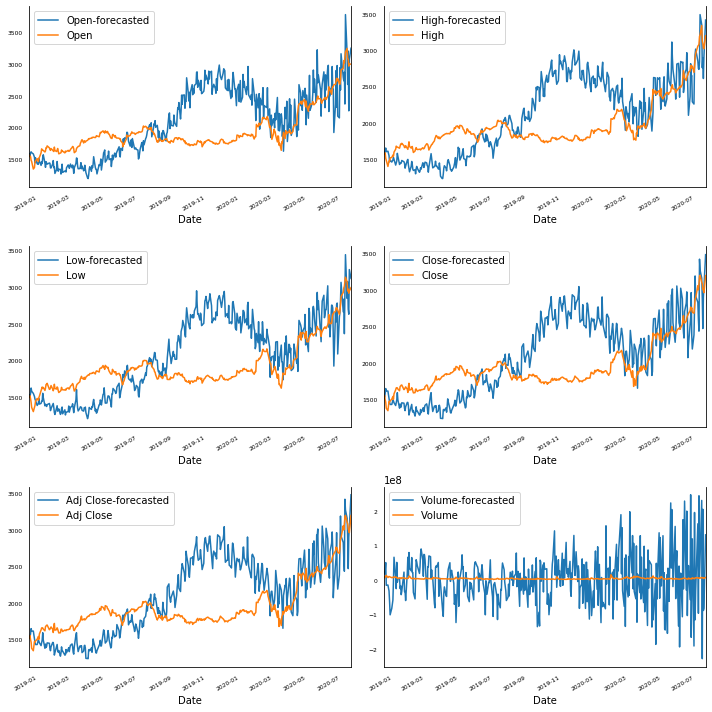

In [262]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(10,10))
for i, (col,ax) in enumerate(zip(x.columns, axes.flatten())):
    res[col+'-forecasted'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    total_test[col][-total_splitter:].plot(legend=True, ax=ax);
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [234]:

print('Open Price')
print('MSE', mean_squared_error(total_test['Open'], res['Open-forecasted'].values, squared=False))
print('Symmetric Mean Absolute Percentage Error', smape(total_test['Open'], res['Open-forecasted'].values))

print('\n')

print('Closing Price')
print('MSE', mean_squared_error(total_test['Close'], res['Close-forecasted'].values, squared=False))
print('Symmetric Mean Absolute Percentage Error', smape(total_test['Close'], res['Close-forecasted'].values))

print('\n')

print('Daily High Price')
print('MSE', mean_squared_error(total_test['High'], res['High-forecasted'].values, squared=False))
print('Symmetric Mean Absolute Percentage Error', smape(total_test['High'], res['High-forecasted'].values))

print('\n')

print('Daily Low Price')
print('MSE', mean_squared_error(total_test['Low'], res['Low-forecasted'].values, squared=False))
print('Symmetric Mean Absolute Percentage Error', smape(total_test['Low'], res['Low-forecasted'].values))

print('\n')

print('Adj Close Price')
print('MSE', mean_squared_error(total_test['Adj Close'], res['Adj Close-forecasted'].values, squared=False))
print('Symmetric Mean Absolute Percentage Error', smape(total_test['Adj Close'], res['Adj Close-forecasted'].values))

print('\n')

print('Volume')
print('MSE', mean_squared_error(total_test['Volume'], res['Volume-forecasted'].values, squared=False))
print('Symmetric Mean Absolute Percentage Error', smape(total_test['Volume'], res['Volume-forecasted'].values))


Open Price
MSE 495.00591962748075
Symmetric Mean Absolute Percentage Error 19.33948114451758


Closing Price
MSE 487.9500385256141
Symmetric Mean Absolute Percentage Error 19.00696690800447


Daily High Price
MSE 484.78079601917074
Symmetric Mean Absolute Percentage Error 18.593096323732517


Daily Low Price
MSE 481.1961779418657
Symmetric Mean Absolute Percentage Error 18.960346438285697


Adj Close Price
MSE 487.9500385184645
Symmetric Mean Absolute Percentage Error 19.006966907215645


Volume
MSE 72891142.27600737
Symmetric Mean Absolute Percentage Error 173.30792294898842


#### As we can see, ARIMA and SARIMA did much better than VAR in terms of accuracy. This was very interesting to see since VAR is supposed to be the better model. I believe this has to do with the dataset being too "simple" for VAR. Since VAR is a more advanced technique than ARIMA and SARIMA, I believe it needs a more advanced dataset thus why ARIMA and SARIMA performed better.

#### SARIMA performed the best with a Symmetric Mean Absolute Percentage Error of 1.2507452130075207. I expected SARIMA to perform better than ARIMA but not better than VAR and I certainly did not expect for ARIMA to outperform VAR as well. These were very interesting results.


# MLP

In [235]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


### Version 1

In [239]:
epochs = 4000
batch = 256
lr = 0.0003

In [240]:
mlp = keras.Sequential()
mlp.add(keras.layers.Dense(100, activation='relu', input_dim=X_train.shape[1]))
mlp.add(keras.layers.Dense(1))
mlp.compile(loss='mse', optimizer=keras.optimizers.Adam(lr))
mlp.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 100)               600       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 101       
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


In [241]:
mfit = mlp.fit(X_train.values, y_train.values, epochs=epochs, verbose=2)

Train on 4124 samples
Epoch 1/4000
4124/4124 - 1s - loss: 86993204975.9109
Epoch 2/4000
4124/4124 - 0s - loss: 73969.8523
Epoch 3/4000
4124/4124 - 0s - loss: 52602.2184
Epoch 4/4000
4124/4124 - 0s - loss: 52522.9267
Epoch 5/4000
4124/4124 - 0s - loss: 52286.9858
Epoch 6/4000
4124/4124 - 0s - loss: 52443.3650
Epoch 7/4000
4124/4124 - 0s - loss: 51825.9237
Epoch 8/4000
4124/4124 - 0s - loss: 50919.5062
Epoch 9/4000
4124/4124 - 0s - loss: 50401.5265
Epoch 10/4000
4124/4124 - 0s - loss: 49912.9353
Epoch 11/4000
4124/4124 - 0s - loss: 49218.5592
Epoch 12/4000
4124/4124 - 0s - loss: 49464.0420
Epoch 13/4000
4124/4124 - 0s - loss: 48136.9301
Epoch 14/4000
4124/4124 - 0s - loss: 47573.9769
Epoch 15/4000
4124/4124 - 0s - loss: 47085.7825
Epoch 16/4000
4124/4124 - 0s - loss: 46858.5787
Epoch 17/4000
4124/4124 - 0s - loss: 44702.2382
Epoch 18/4000
4124/4124 - 0s - loss: 44637.9970
Epoch 19/4000
4124/4124 - 0s - loss: 42978.0960
Epoch 20/4000
4124/4124 - 0s - loss: 42118.8591
Epoch 21/4000
4124/41

Epoch 171/4000
4124/4124 - 0s - loss: 42.7049
Epoch 172/4000
4124/4124 - 0s - loss: 29.4007
Epoch 173/4000
4124/4124 - 0s - loss: 18.2164
Epoch 174/4000
4124/4124 - 0s - loss: 12.2315
Epoch 175/4000
4124/4124 - 0s - loss: 34.1264
Epoch 176/4000
4124/4124 - 0s - loss: 7810.5983
Epoch 177/4000
4124/4124 - 0s - loss: 22089095.0563
Epoch 178/4000
4124/4124 - 0s - loss: 76743430.0553
Epoch 179/4000
4124/4124 - 0s - loss: 505863.0182
Epoch 180/4000
4124/4124 - 0s - loss: 482.2520
Epoch 181/4000
4124/4124 - 0s - loss: 59.0976
Epoch 182/4000
4124/4124 - 0s - loss: 8.9570
Epoch 183/4000
4124/4124 - 0s - loss: 12.9612
Epoch 184/4000
4124/4124 - 0s - loss: 11.3532
Epoch 185/4000
4124/4124 - 0s - loss: 25.7361
Epoch 186/4000
4124/4124 - 0s - loss: 16.5489
Epoch 187/4000
4124/4124 - 0s - loss: 20.8682
Epoch 188/4000
4124/4124 - 0s - loss: 80.5660
Epoch 189/4000
4124/4124 - 0s - loss: 7603.7057
Epoch 190/4000
4124/4124 - 0s - loss: 682201.0174
Epoch 191/4000
4124/4124 - 0s - loss: 10891795.4455
Epoc

4124/4124 - 0s - loss: 62210.3535
Epoch 342/4000
4124/4124 - 0s - loss: 340868.2289
Epoch 343/4000
4124/4124 - 0s - loss: 998694.5328
Epoch 344/4000
4124/4124 - 0s - loss: 39465.1884
Epoch 345/4000
4124/4124 - 0s - loss: 281.7304
Epoch 346/4000
4124/4124 - 0s - loss: 539969.7292
Epoch 347/4000
4124/4124 - 0s - loss: 51152.4255
Epoch 348/4000
4124/4124 - 0s - loss: 634120.5933
Epoch 349/4000
4124/4124 - 0s - loss: 1009689.6874
Epoch 350/4000
4124/4124 - 0s - loss: 77382485.0768
Epoch 351/4000
4124/4124 - 0s - loss: 948839.2175
Epoch 352/4000
4124/4124 - 0s - loss: 647.7345
Epoch 353/4000
4124/4124 - 0s - loss: 889.9001
Epoch 354/4000
4124/4124 - 0s - loss: 3387.5972
Epoch 355/4000
4124/4124 - 0s - loss: 4864.0055
Epoch 356/4000
4124/4124 - 0s - loss: 2789.1963
Epoch 357/4000
4124/4124 - 0s - loss: 11906.8044
Epoch 358/4000
4124/4124 - 0s - loss: 525425.8688
Epoch 359/4000
4124/4124 - 0s - loss: 5386642.9760
Epoch 360/4000
4124/4124 - 0s - loss: 545341676.2132
Epoch 361/4000
4124/4124 - 

Epoch 510/4000
4124/4124 - 0s - loss: 57925082.4451
Epoch 511/4000
4124/4124 - 0s - loss: 358885593.5830
Epoch 512/4000
4124/4124 - 0s - loss: 5721456.8713
Epoch 513/4000
4124/4124 - 0s - loss: 22030.5239
Epoch 514/4000
4124/4124 - 0s - loss: 1070.2542
Epoch 515/4000
4124/4124 - 0s - loss: 1077.6353
Epoch 516/4000
4124/4124 - 0s - loss: 448.7468
Epoch 517/4000
4124/4124 - 0s - loss: 480.1115
Epoch 518/4000
4124/4124 - 0s - loss: 389.2723
Epoch 519/4000
4124/4124 - 0s - loss: 351.8715
Epoch 520/4000
4124/4124 - 0s - loss: 329.1815
Epoch 521/4000
4124/4124 - 0s - loss: 288.4864
Epoch 522/4000
4124/4124 - 0s - loss: 208.7659
Epoch 523/4000
4124/4124 - 0s - loss: 325.1556
Epoch 524/4000
4124/4124 - 0s - loss: 322.7746
Epoch 525/4000
4124/4124 - 0s - loss: 857.8433
Epoch 526/4000
4124/4124 - 0s - loss: 438.9987
Epoch 527/4000
4124/4124 - 0s - loss: 740.4206
Epoch 528/4000
4124/4124 - 0s - loss: 666.4006
Epoch 529/4000
4124/4124 - 0s - loss: 74.6260
Epoch 530/4000
4124/4124 - 0s - loss: 5544

Epoch 678/4000
4124/4124 - 0s - loss: 9186.7496
Epoch 679/4000
4124/4124 - 0s - loss: 912.4834
Epoch 680/4000
4124/4124 - 0s - loss: 29246.2422
Epoch 681/4000
4124/4124 - 0s - loss: 1840.1863
Epoch 682/4000
4124/4124 - 0s - loss: 35476.7605
Epoch 683/4000
4124/4124 - 0s - loss: 900884.3187
Epoch 684/4000
4124/4124 - 0s - loss: 128638375.0252
Epoch 685/4000
4124/4124 - 0s - loss: 227568.7410
Epoch 686/4000
4124/4124 - 0s - loss: 1757.3850
Epoch 687/4000
4124/4124 - 0s - loss: 863.4880
Epoch 688/4000
4124/4124 - 0s - loss: 816.4330
Epoch 689/4000
4124/4124 - 0s - loss: 474.6766
Epoch 690/4000
4124/4124 - 0s - loss: 8721.1705
Epoch 691/4000
4124/4124 - 0s - loss: 137764.6790
Epoch 692/4000
4124/4124 - 0s - loss: 4868.5995
Epoch 693/4000
4124/4124 - 0s - loss: 71540.8205
Epoch 694/4000
4124/4124 - 0s - loss: 485114.1219
Epoch 695/4000
4124/4124 - 0s - loss: 6818.2960
Epoch 696/4000
4124/4124 - 0s - loss: 25464.9593
Epoch 697/4000
4124/4124 - 0s - loss: 3965.0298
Epoch 698/4000
4124/4124 - 

Epoch 849/4000
4124/4124 - 0s - loss: 153.9738
Epoch 850/4000
4124/4124 - 0s - loss: 71.9338
Epoch 851/4000
4124/4124 - 0s - loss: 650.8407
Epoch 852/4000
4124/4124 - 0s - loss: 1059.6872
Epoch 853/4000
4124/4124 - 0s - loss: 1624496.2365
Epoch 854/4000
4124/4124 - 0s - loss: 2792037.3567
Epoch 855/4000
4124/4124 - 0s - loss: 31391402.3113
Epoch 856/4000
4124/4124 - 0s - loss: 1359206.4191
Epoch 857/4000
4124/4124 - 0s - loss: 6320.0485
Epoch 858/4000
4124/4124 - 0s - loss: 1591.6399
Epoch 859/4000
4124/4124 - 0s - loss: 151.0844
Epoch 860/4000
4124/4124 - 0s - loss: 63650.3460
Epoch 861/4000
4124/4124 - 0s - loss: 2014082.2725
Epoch 862/4000
4124/4124 - 0s - loss: 24804554.2011
Epoch 863/4000
4124/4124 - 0s - loss: 170871434.3153
Epoch 864/4000
4124/4124 - 0s - loss: 540885.4090
Epoch 865/4000
4124/4124 - 0s - loss: 157674.9186
Epoch 866/4000
4124/4124 - 0s - loss: 393.3631
Epoch 867/4000
4124/4124 - 0s - loss: 11.1792
Epoch 868/4000
4124/4124 - 0s - loss: 7.9370
Epoch 869/4000
4124/4

Epoch 1020/4000
4124/4124 - 0s - loss: 604203.8576
Epoch 1021/4000
4124/4124 - 0s - loss: 2510.2663
Epoch 1022/4000
4124/4124 - 0s - loss: 179.7240
Epoch 1023/4000
4124/4124 - 0s - loss: 358.4633
Epoch 1024/4000
4124/4124 - 0s - loss: 480.1274
Epoch 1025/4000
4124/4124 - 0s - loss: 276.4167
Epoch 1026/4000
4124/4124 - 0s - loss: 77.3052
Epoch 1027/4000
4124/4124 - 0s - loss: 54.6883
Epoch 1028/4000
4124/4124 - 0s - loss: 1731.8562
Epoch 1029/4000
4124/4124 - 0s - loss: 198863.6330
Epoch 1030/4000
4124/4124 - 0s - loss: 1016853.1432
Epoch 1031/4000
4124/4124 - 0s - loss: 142720.6136
Epoch 1032/4000
4124/4124 - 0s - loss: 41649.0040
Epoch 1033/4000
4124/4124 - 0s - loss: 57756.3449
Epoch 1034/4000
4124/4124 - 0s - loss: 228042.3070
Epoch 1035/4000
4124/4124 - 0s - loss: 115586.3433
Epoch 1036/4000
4124/4124 - 0s - loss: 2732.4732
Epoch 1037/4000
4124/4124 - 0s - loss: 58197.4402
Epoch 1038/4000
4124/4124 - 0s - loss: 45711.3338
Epoch 1039/4000
4124/4124 - 0s - loss: 138051493.7119
Epoch 

4124/4124 - 0s - loss: 25.4219
Epoch 1189/4000
4124/4124 - 0s - loss: 84.9594
Epoch 1190/4000
4124/4124 - 0s - loss: 28693.1106
Epoch 1191/4000
4124/4124 - 0s - loss: 16167.0533
Epoch 1192/4000
4124/4124 - 0s - loss: 12754.5618
Epoch 1193/4000
4124/4124 - 0s - loss: 38132.9155
Epoch 1194/4000
4124/4124 - 0s - loss: 26908.2621
Epoch 1195/4000
4124/4124 - 0s - loss: 6085169.4680
Epoch 1196/4000
4124/4124 - 0s - loss: 21913613.9488
Epoch 1197/4000
4124/4124 - 0s - loss: 4153.6361
Epoch 1198/4000
4124/4124 - 0s - loss: 233.1411
Epoch 1199/4000
4124/4124 - 0s - loss: 29.2579
Epoch 1200/4000
4124/4124 - 0s - loss: 96.9344
Epoch 1201/4000
4124/4124 - 0s - loss: 8211.4741
Epoch 1202/4000
4124/4124 - 0s - loss: 3864.0841
Epoch 1203/4000
4124/4124 - 0s - loss: 11097.7292
Epoch 1204/4000
4124/4124 - 0s - loss: 1054113.6396
Epoch 1205/4000
4124/4124 - 0s - loss: 545890.4058
Epoch 1206/4000
4124/4124 - 0s - loss: 18242.1533
Epoch 1207/4000
4124/4124 - 0s - loss: 8693502.0527
Epoch 1208/4000
4124/41

Epoch 1354/4000
4124/4124 - 0s - loss: 5.4986
Epoch 1355/4000
4124/4124 - 0s - loss: 23.1613
Epoch 1356/4000
4124/4124 - 0s - loss: 6.1429
Epoch 1357/4000
4124/4124 - 0s - loss: 8.1845
Epoch 1358/4000
4124/4124 - 0s - loss: 6.6174
Epoch 1359/4000
4124/4124 - 0s - loss: 9.0856
Epoch 1360/4000
4124/4124 - 0s - loss: 24.3395
Epoch 1361/4000
4124/4124 - 0s - loss: 16.8496
Epoch 1362/4000
4124/4124 - 0s - loss: 12.8748
Epoch 1363/4000
4124/4124 - 0s - loss: 31.1084
Epoch 1364/4000
4124/4124 - 0s - loss: 57.4751
Epoch 1365/4000
4124/4124 - 0s - loss: 101.1749
Epoch 1366/4000
4124/4124 - 0s - loss: 11.4267
Epoch 1367/4000
4124/4124 - 0s - loss: 30.2387
Epoch 1368/4000
4124/4124 - 0s - loss: 252.1609
Epoch 1369/4000
4124/4124 - 0s - loss: 3838.8105
Epoch 1370/4000
4124/4124 - 0s - loss: 9400.4107
Epoch 1371/4000
4124/4124 - 0s - loss: 72.3158
Epoch 1372/4000
4124/4124 - 0s - loss: 396.0769
Epoch 1373/4000
4124/4124 - 0s - loss: 152084.3576
Epoch 1374/4000
4124/4124 - 0s - loss: 98068776.9866
E

Epoch 1521/4000
4124/4124 - 0s - loss: 58.3108
Epoch 1522/4000
4124/4124 - 0s - loss: 536.2686
Epoch 1523/4000
4124/4124 - 0s - loss: 72.0977
Epoch 1524/4000
4124/4124 - 0s - loss: 34.1982
Epoch 1525/4000
4124/4124 - 0s - loss: 7789.1417
Epoch 1526/4000
4124/4124 - 0s - loss: 150758.2732
Epoch 1527/4000
4124/4124 - 0s - loss: 46273.5314
Epoch 1528/4000
4124/4124 - 0s - loss: 74230620.9017
Epoch 1529/4000
4124/4124 - 0s - loss: 33210242.7039
Epoch 1530/4000
4124/4124 - 0s - loss: 37384.3018
Epoch 1531/4000
4124/4124 - 0s - loss: 42.4205
Epoch 1532/4000
4124/4124 - 0s - loss: 34.4273
Epoch 1533/4000
4124/4124 - 0s - loss: 37.7807
Epoch 1534/4000
4124/4124 - 0s - loss: 97.7523
Epoch 1535/4000
4124/4124 - 0s - loss: 186.8986
Epoch 1536/4000
4124/4124 - 0s - loss: 7907.5646
Epoch 1537/4000
4124/4124 - 0s - loss: 559.1161
Epoch 1538/4000
4124/4124 - 0s - loss: 46.2326
Epoch 1539/4000
4124/4124 - 0s - loss: 776.3758
Epoch 1540/4000
4124/4124 - 0s - loss: 54790.3508
Epoch 1541/4000
4124/4124 -

Epoch 1688/4000
4124/4124 - 0s - loss: 29749.0753
Epoch 1689/4000
4124/4124 - 0s - loss: 423211.4637
Epoch 1690/4000
4124/4124 - 0s - loss: 782218.4255
Epoch 1691/4000
4124/4124 - 0s - loss: 253159.2721
Epoch 1692/4000
4124/4124 - 0s - loss: 126767.7251
Epoch 1693/4000
4124/4124 - 0s - loss: 5799.4721
Epoch 1694/4000
4124/4124 - 0s - loss: 97.3186
Epoch 1695/4000
4124/4124 - 0s - loss: 8025.4681
Epoch 1696/4000
4124/4124 - 0s - loss: 25259.7360
Epoch 1697/4000
4124/4124 - 0s - loss: 1681.7566
Epoch 1698/4000
4124/4124 - 0s - loss: 1550.7370
Epoch 1699/4000
4124/4124 - 0s - loss: 291.6850
Epoch 1700/4000
4124/4124 - 0s - loss: 11206009.2848
Epoch 1701/4000
4124/4124 - 0s - loss: 197344202.7276
Epoch 1702/4000
4124/4124 - 0s - loss: 1616475.7643
Epoch 1703/4000
4124/4124 - 0s - loss: 628.7955
Epoch 1704/4000
4124/4124 - 0s - loss: 40.5083
Epoch 1705/4000
4124/4124 - 0s - loss: 60.4895
Epoch 1706/4000
4124/4124 - 0s - loss: 34.4173
Epoch 1707/4000
4124/4124 - 0s - loss: 56.1977
Epoch 1708

Epoch 1855/4000
4124/4124 - 0s - loss: 30074.6184
Epoch 1856/4000
4124/4124 - 0s - loss: 83.7306
Epoch 1857/4000
4124/4124 - 0s - loss: 130.3150
Epoch 1858/4000
4124/4124 - 0s - loss: 894.6864
Epoch 1859/4000
4124/4124 - 0s - loss: 382.8555
Epoch 1860/4000
4124/4124 - 0s - loss: 30710.2571
Epoch 1861/4000
4124/4124 - 0s - loss: 5349982.3899
Epoch 1862/4000
4124/4124 - 0s - loss: 68621.2536
Epoch 1863/4000
4124/4124 - 0s - loss: 15953.5503
Epoch 1864/4000
4124/4124 - 0s - loss: 666120078.9841
Epoch 1865/4000
4124/4124 - 0s - loss: 168168.2040
Epoch 1866/4000
4124/4124 - 0s - loss: 397.8867
Epoch 1867/4000
4124/4124 - 0s - loss: 378.7222
Epoch 1868/4000
4124/4124 - 0s - loss: 357.1442
Epoch 1869/4000
4124/4124 - 0s - loss: 356.2410
Epoch 1870/4000
4124/4124 - 0s - loss: 300.3182
Epoch 1871/4000
4124/4124 - 0s - loss: 287.9356
Epoch 1872/4000
4124/4124 - 0s - loss: 303.0526
Epoch 1873/4000
4124/4124 - 0s - loss: 739.3247
Epoch 1874/4000
4124/4124 - 0s - loss: 205.0498
Epoch 1875/4000
4124

4124/4124 - 0s - loss: 151.8945
Epoch 2021/4000
4124/4124 - 0s - loss: 130.0104
Epoch 2022/4000
4124/4124 - 0s - loss: 136.5478
Epoch 2023/4000
4124/4124 - 0s - loss: 114.5367
Epoch 2024/4000
4124/4124 - 0s - loss: 118.0673
Epoch 2025/4000
4124/4124 - 0s - loss: 103.8627
Epoch 2026/4000
4124/4124 - 0s - loss: 143.4276
Epoch 2027/4000
4124/4124 - 0s - loss: 92.8685
Epoch 2028/4000
4124/4124 - 0s - loss: 158.4840
Epoch 2029/4000
4124/4124 - 0s - loss: 74.3535
Epoch 2030/4000
4124/4124 - 0s - loss: 124.1754
Epoch 2031/4000
4124/4124 - 0s - loss: 132.4347
Epoch 2032/4000
4124/4124 - 0s - loss: 77.9079
Epoch 2033/4000
4124/4124 - 0s - loss: 418.6624
Epoch 2034/4000
4124/4124 - 0s - loss: 50.9883
Epoch 2035/4000
4124/4124 - 0s - loss: 79.7851
Epoch 2036/4000
4124/4124 - 0s - loss: 48.0799
Epoch 2037/4000
4124/4124 - 0s - loss: 64.1589
Epoch 2038/4000
4124/4124 - 0s - loss: 30.4993
Epoch 2039/4000
4124/4124 - 0s - loss: 36.7362
Epoch 2040/4000
4124/4124 - 0s - loss: 13.1058
Epoch 2041/4000
41

4124/4124 - 0s - loss: 230.4858
Epoch 2188/4000
4124/4124 - 0s - loss: 322.8142
Epoch 2189/4000
4124/4124 - 0s - loss: 256.3890
Epoch 2190/4000
4124/4124 - 0s - loss: 704.0499
Epoch 2191/4000
4124/4124 - 0s - loss: 245.4260
Epoch 2192/4000
4124/4124 - 0s - loss: 96.7319
Epoch 2193/4000
4124/4124 - 0s - loss: 74.7514
Epoch 2194/4000
4124/4124 - 0s - loss: 670407.2200
Epoch 2195/4000
4124/4124 - 0s - loss: 36312.8352
Epoch 2196/4000
4124/4124 - 0s - loss: 84.6638
Epoch 2197/4000
4124/4124 - 0s - loss: 510.8527
Epoch 2198/4000
4124/4124 - 0s - loss: 3822.3382
Epoch 2199/4000
4124/4124 - 0s - loss: 625.5876
Epoch 2200/4000
4124/4124 - 0s - loss: 17.2240
Epoch 2201/4000
4124/4124 - 0s - loss: 24130.1581
Epoch 2202/4000
4124/4124 - 0s - loss: 242792.8203
Epoch 2203/4000
4124/4124 - 0s - loss: 8213.2111
Epoch 2204/4000
4124/4124 - 0s - loss: 2479172.0651
Epoch 2205/4000
4124/4124 - 0s - loss: 111466651.9490
Epoch 2206/4000
4124/4124 - 0s - loss: 1405757.2809
Epoch 2207/4000
4124/4124 - 0s - l

Epoch 2354/4000
4124/4124 - 0s - loss: 3585.2558
Epoch 2355/4000
4124/4124 - 0s - loss: 1778.1251
Epoch 2356/4000
4124/4124 - 0s - loss: 976.3080
Epoch 2357/4000
4124/4124 - 0s - loss: 7574.2025
Epoch 2358/4000
4124/4124 - 0s - loss: 410.8727
Epoch 2359/4000
4124/4124 - 0s - loss: 27070.8319
Epoch 2360/4000
4124/4124 - 0s - loss: 109351.8410
Epoch 2361/4000
4124/4124 - 0s - loss: 45349.3804
Epoch 2362/4000
4124/4124 - 0s - loss: 119606.8059
Epoch 2363/4000
4124/4124 - 0s - loss: 9860423.0626
Epoch 2364/4000
4124/4124 - 0s - loss: 151210736.0946
Epoch 2365/4000
4124/4124 - 0s - loss: 9529097.5446
Epoch 2366/4000
4124/4124 - 0s - loss: 97366.5626
Epoch 2367/4000
4124/4124 - 0s - loss: 405.1386
Epoch 2368/4000
4124/4124 - 0s - loss: 197.9219
Epoch 2369/4000
4124/4124 - 0s - loss: 263.9978
Epoch 2370/4000
4124/4124 - 0s - loss: 181.5278
Epoch 2371/4000
4124/4124 - 0s - loss: 177.5655
Epoch 2372/4000
4124/4124 - 0s - loss: 113.8919
Epoch 2373/4000
4124/4124 - 0s - loss: 139.8053
Epoch 2374/

Epoch 2520/4000
4124/4124 - 0s - loss: 1298441.2603
Epoch 2521/4000
4124/4124 - 0s - loss: 5472844.6405
Epoch 2522/4000
4124/4124 - 0s - loss: 1699452.9895
Epoch 2523/4000
4124/4124 - 0s - loss: 224.0748
Epoch 2524/4000
4124/4124 - 0s - loss: 17.1392
Epoch 2525/4000
4124/4124 - 0s - loss: 5126.6008
Epoch 2526/4000
4124/4124 - 0s - loss: 199049.6049
Epoch 2527/4000
4124/4124 - 0s - loss: 52407520.1262
Epoch 2528/4000
4124/4124 - 0s - loss: 18344753.9506
Epoch 2529/4000
4124/4124 - 0s - loss: 2246.6292
Epoch 2530/4000
4124/4124 - 0s - loss: 2022.5190
Epoch 2531/4000
4124/4124 - 0s - loss: 278.8943
Epoch 2532/4000
4124/4124 - 0s - loss: 665.9017
Epoch 2533/4000
4124/4124 - 0s - loss: 3722.9798
Epoch 2534/4000
4124/4124 - 0s - loss: 1940.9644
Epoch 2535/4000
4124/4124 - 0s - loss: 3853.8292
Epoch 2536/4000
4124/4124 - 0s - loss: 157.9305
Epoch 2537/4000
4124/4124 - 0s - loss: 5570.5870
Epoch 2538/4000
4124/4124 - 0s - loss: 38472.9141
Epoch 2539/4000
4124/4124 - 0s - loss: 389779.2753
Epoc

Epoch 2687/4000
4124/4124 - 0s - loss: 78.9954
Epoch 2688/4000
4124/4124 - 0s - loss: 49.0588
Epoch 2689/4000
4124/4124 - 0s - loss: 463.0185
Epoch 2690/4000
4124/4124 - 0s - loss: 184.9877
Epoch 2691/4000
4124/4124 - 0s - loss: 132.7267
Epoch 2692/4000
4124/4124 - 0s - loss: 27.7920
Epoch 2693/4000
4124/4124 - 0s - loss: 13.5168
Epoch 2694/4000
4124/4124 - 0s - loss: 204.3940
Epoch 2695/4000
4124/4124 - 0s - loss: 840.7102
Epoch 2696/4000
4124/4124 - 0s - loss: 75875.1168
Epoch 2697/4000
4124/4124 - 0s - loss: 990683.6964
Epoch 2698/4000
4124/4124 - 0s - loss: 10206023.6792
Epoch 2699/4000
4124/4124 - 0s - loss: 27349526.2079
Epoch 2700/4000
4124/4124 - 0s - loss: 3117012.0020
Epoch 2701/4000
4124/4124 - 0s - loss: 45945.1198
Epoch 2702/4000
4124/4124 - 0s - loss: 399.3474
Epoch 2703/4000
4124/4124 - 0s - loss: 4538.9825
Epoch 2704/4000
4124/4124 - 0s - loss: 5738.9722
Epoch 2705/4000
4124/4124 - 0s - loss: 370.7263
Epoch 2706/4000
4124/4124 - 0s - loss: 194.5403
Epoch 2707/4000
4124/

Epoch 2853/4000
4124/4124 - 0s - loss: 7738817.3626
Epoch 2854/4000
4124/4124 - 0s - loss: 1473867.1156
Epoch 2855/4000
4124/4124 - 0s - loss: 24436.6126
Epoch 2856/4000
4124/4124 - 0s - loss: 1300.4942
Epoch 2857/4000
4124/4124 - 0s - loss: 13678.5594
Epoch 2858/4000
4124/4124 - 0s - loss: 24341033.0248
Epoch 2859/4000
4124/4124 - 0s - loss: 335177.6539
Epoch 2860/4000
4124/4124 - 0s - loss: 545.6376
Epoch 2861/4000
4124/4124 - 0s - loss: 9323.0572
Epoch 2862/4000
4124/4124 - 0s - loss: 2076.8525
Epoch 2863/4000
4124/4124 - 0s - loss: 269.8389
Epoch 2864/4000
4124/4124 - 0s - loss: 633.1952
Epoch 2865/4000
4124/4124 - 0s - loss: 176.2739
Epoch 2866/4000
4124/4124 - 0s - loss: 1725.8548
Epoch 2867/4000
4124/4124 - 0s - loss: 9343.5081
Epoch 2868/4000
4124/4124 - 0s - loss: 930197.5201
Epoch 2869/4000
4124/4124 - 0s - loss: 268860373.7044
Epoch 2870/4000
4124/4124 - 0s - loss: 6280556.0156
Epoch 2871/4000
4124/4124 - 0s - loss: 1020.3043
Epoch 2872/4000
4124/4124 - 0s - loss: 238.4882
E

Epoch 3020/4000
4124/4124 - 0s - loss: 28.8236
Epoch 3021/4000
4124/4124 - 0s - loss: 37.9918
Epoch 3022/4000
4124/4124 - 0s - loss: 28.0125
Epoch 3023/4000
4124/4124 - 0s - loss: 888.6834
Epoch 3024/4000
4124/4124 - 0s - loss: 12.6213
Epoch 3025/4000
4124/4124 - 0s - loss: 11.5990
Epoch 3026/4000
4124/4124 - 0s - loss: 53.3767
Epoch 3027/4000
4124/4124 - 0s - loss: 240.1375
Epoch 3028/4000
4124/4124 - 0s - loss: 43.3601
Epoch 3029/4000
4124/4124 - 0s - loss: 165.5782
Epoch 3030/4000
4124/4124 - 0s - loss: 268.4563
Epoch 3031/4000
4124/4124 - 0s - loss: 33.0509
Epoch 3032/4000
4124/4124 - 0s - loss: 608.6507
Epoch 3033/4000
4124/4124 - 0s - loss: 11873206.5716
Epoch 3034/4000
4124/4124 - 0s - loss: 1347737.9879
Epoch 3035/4000
4124/4124 - 0s - loss: 4408.0092
Epoch 3036/4000
4124/4124 - 0s - loss: 18568.6209
Epoch 3037/4000
4124/4124 - 0s - loss: 1253045.1561
Epoch 3038/4000
4124/4124 - 0s - loss: 92171082.0744
Epoch 3039/4000
4124/4124 - 0s - loss: 10672495.6237
Epoch 3040/4000
4124/4

Epoch 3186/4000
4124/4124 - 0s - loss: 98249647.7832
Epoch 3187/4000
4124/4124 - 0s - loss: 31226710.2663
Epoch 3188/4000
4124/4124 - 0s - loss: 258.1441
Epoch 3189/4000
4124/4124 - 0s - loss: 68.7538
Epoch 3190/4000
4124/4124 - 0s - loss: 42.3403
Epoch 3191/4000
4124/4124 - 0s - loss: 26.0621
Epoch 3192/4000
4124/4124 - 0s - loss: 19.9923
Epoch 3193/4000
4124/4124 - 0s - loss: 28.7930
Epoch 3194/4000
4124/4124 - 0s - loss: 25.1730
Epoch 3195/4000
4124/4124 - 0s - loss: 18.5128
Epoch 3196/4000
4124/4124 - 0s - loss: 25.4698
Epoch 3197/4000
4124/4124 - 0s - loss: 3929.9972
Epoch 3198/4000
4124/4124 - 0s - loss: 7135.3155
Epoch 3199/4000
4124/4124 - 0s - loss: 545.1309
Epoch 3200/4000
4124/4124 - 0s - loss: 11.9453
Epoch 3201/4000
4124/4124 - 0s - loss: 29.1052
Epoch 3202/4000
4124/4124 - 0s - loss: 620.7234
Epoch 3203/4000
4124/4124 - 0s - loss: 2815.4843
Epoch 3204/4000
4124/4124 - 0s - loss: 248560.9035
Epoch 3205/4000
4124/4124 - 0s - loss: 10238590.2323
Epoch 3206/4000
4124/4124 - 0

Epoch 3353/4000
4124/4124 - 0s - loss: 237587.7080
Epoch 3354/4000
4124/4124 - 0s - loss: 11584991.1532
Epoch 3355/4000
4124/4124 - 0s - loss: 7181598.7614
Epoch 3356/4000
4124/4124 - 0s - loss: 860.5313
Epoch 3357/4000
4124/4124 - 0s - loss: 1050.6870
Epoch 3358/4000
4124/4124 - 0s - loss: 600566.8580
Epoch 3359/4000
4124/4124 - 0s - loss: 5140546.9784
Epoch 3360/4000
4124/4124 - 0s - loss: 40593854.9830
Epoch 3361/4000
4124/4124 - 0s - loss: 1470.9515
Epoch 3362/4000
4124/4124 - 0s - loss: 429.9368
Epoch 3363/4000
4124/4124 - 0s - loss: 464.6199
Epoch 3364/4000
4124/4124 - 0s - loss: 401.4181
Epoch 3365/4000
4124/4124 - 0s - loss: 3400.2090
Epoch 3366/4000
4124/4124 - 0s - loss: 89701.4581
Epoch 3367/4000
4124/4124 - 0s - loss: 7181.7053
Epoch 3368/4000
4124/4124 - 0s - loss: 652311.2897
Epoch 3369/4000
4124/4124 - 0s - loss: 17452471.7961
Epoch 3370/4000
4124/4124 - 0s - loss: 9611.6478
Epoch 3371/4000
4124/4124 - 0s - loss: 102533.6404
Epoch 3372/4000
4124/4124 - 0s - loss: 581.157

4124/4124 - 0s - loss: 69.5392
Epoch 3519/4000
4124/4124 - 0s - loss: 58.7091
Epoch 3520/4000
4124/4124 - 0s - loss: 91.5008
Epoch 3521/4000
4124/4124 - 0s - loss: 49.1916
Epoch 3522/4000
4124/4124 - 0s - loss: 48.5102
Epoch 3523/4000
4124/4124 - 0s - loss: 40.0294
Epoch 3524/4000
4124/4124 - 0s - loss: 77.6440
Epoch 3525/4000
4124/4124 - 0s - loss: 40.6168
Epoch 3526/4000
4124/4124 - 0s - loss: 71.0597
Epoch 3527/4000
4124/4124 - 0s - loss: 43.3567
Epoch 3528/4000
4124/4124 - 0s - loss: 351.7594
Epoch 3529/4000
4124/4124 - 0s - loss: 452.0125
Epoch 3530/4000
4124/4124 - 0s - loss: 1672.2901
Epoch 3531/4000
4124/4124 - 0s - loss: 55586.8600
Epoch 3532/4000
4124/4124 - 0s - loss: 4306.9914
Epoch 3533/4000
4124/4124 - 0s - loss: 51.8417
Epoch 3534/4000
4124/4124 - 0s - loss: 209.5071
Epoch 3535/4000
4124/4124 - 0s - loss: 19314.9355
Epoch 3536/4000
4124/4124 - 0s - loss: 1630.3454
Epoch 3537/4000
4124/4124 - 0s - loss: 806276.5237
Epoch 3538/4000
4124/4124 - 0s - loss: 61265442.9908
Epoc

4124/4124 - 0s - loss: 38.6051
Epoch 3688/4000
4124/4124 - 0s - loss: 8.1840
Epoch 3689/4000
4124/4124 - 0s - loss: 4.9365
Epoch 3690/4000
4124/4124 - 0s - loss: 11.3309
Epoch 3691/4000
4124/4124 - 0s - loss: 4.9883
Epoch 3692/4000
4124/4124 - 0s - loss: 13.0885
Epoch 3693/4000
4124/4124 - 0s - loss: 288.9122
Epoch 3694/4000
4124/4124 - 0s - loss: 661.7840
Epoch 3695/4000
4124/4124 - 0s - loss: 5.5666
Epoch 3696/4000
4124/4124 - 0s - loss: 57.2289
Epoch 3697/4000
4124/4124 - 0s - loss: 47.9455
Epoch 3698/4000
4124/4124 - 0s - loss: 1014.7634
Epoch 3699/4000
4124/4124 - 0s - loss: 399.1601
Epoch 3700/4000
4124/4124 - 0s - loss: 4723.7707
Epoch 3701/4000
4124/4124 - 0s - loss: 209.2859
Epoch 3702/4000
4124/4124 - 0s - loss: 245.1011
Epoch 3703/4000
4124/4124 - 0s - loss: 12664.9602
Epoch 3704/4000
4124/4124 - 0s - loss: 895455.6876
Epoch 3705/4000
4124/4124 - 0s - loss: 38929368.6630
Epoch 3706/4000
4124/4124 - 0s - loss: 234460.1135
Epoch 3707/4000
4124/4124 - 0s - loss: 4637.7567
Epoch

Epoch 3855/4000
4124/4124 - 0s - loss: 198321.9934
Epoch 3856/4000
4124/4124 - 0s - loss: 3861.2011
Epoch 3857/4000
4124/4124 - 0s - loss: 1621.8397
Epoch 3858/4000
4124/4124 - 0s - loss: 6872.5097
Epoch 3859/4000
4124/4124 - 0s - loss: 390.2996
Epoch 3860/4000
4124/4124 - 0s - loss: 1059.6885
Epoch 3861/4000
4124/4124 - 0s - loss: 172355.9918
Epoch 3862/4000
4124/4124 - 0s - loss: 1300347.3447
Epoch 3863/4000
4124/4124 - 0s - loss: 9818954.1341
Epoch 3864/4000
4124/4124 - 0s - loss: 49757015.3013
Epoch 3865/4000
4124/4124 - 0s - loss: 6455660.3986
Epoch 3866/4000
4124/4124 - 0s - loss: 16184.8298
Epoch 3867/4000
4124/4124 - 0s - loss: 310.6206
Epoch 3868/4000
4124/4124 - 0s - loss: 15637.1614
Epoch 3869/4000
4124/4124 - 0s - loss: 10506.4870
Epoch 3870/4000
4124/4124 - 0s - loss: 5257.2155
Epoch 3871/4000
4124/4124 - 0s - loss: 1236.6789
Epoch 3872/4000
4124/4124 - 0s - loss: 24.8100
Epoch 3873/4000
4124/4124 - 0s - loss: 98.4221
Epoch 3874/4000
4124/4124 - 0s - loss: 16.2556
Epoch 38

In [242]:
mpred1 = mlp.predict(X_test.values, verbose=0)

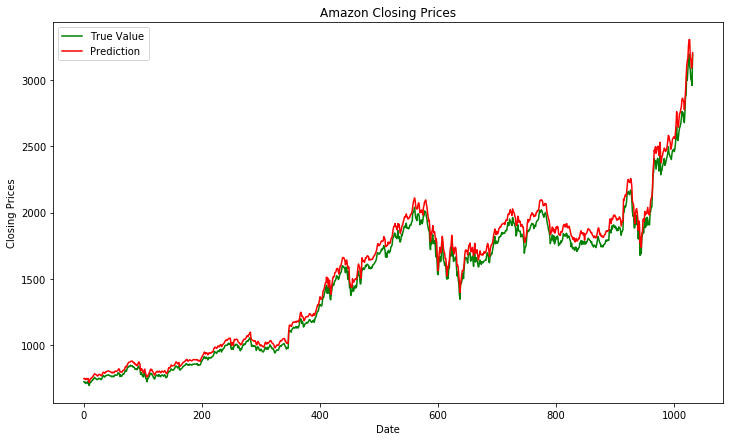

In [243]:
plt.figure(figsize=(12,7))
plt.title('Amazon Closing Prices')
plt.ylabel('Closing Prices')
plt.xlabel('Date')
plt.plot(y_test.values, 'green', label='True Value')
plt.plot(mpred1, 'red', label='Prediction')
plt.legend()

### Version 2

In [244]:
epochs = 4000
batch = 128
lr = 0.001

In [245]:
mlp = keras.Sequential()
mlp.add(keras.layers.Dense(64, activation='softmax', input_dim=X_train.shape[1]))
mlp.add(keras.layers.Dense(1))
mlp.compile(loss='mse', optimizer=keras.optimizers.Adam(lr))
mlp.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 64)                384       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 65        
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [246]:
mfit = mlp.fit(X_train.values, y_train.values, epochs=epochs, verbose=2)

Train on 4124 samples
Epoch 1/4000
4124/4124 - 1s - loss: 45616.6760
Epoch 2/4000
4124/4124 - 0s - loss: 45542.9644
Epoch 3/4000
4124/4124 - 0s - loss: 45469.3516
Epoch 4/4000
4124/4124 - 0s - loss: 45395.8013
Epoch 5/4000
4124/4124 - 0s - loss: 45322.4234
Epoch 6/4000
4124/4124 - 0s - loss: 45249.1060
Epoch 7/4000
4124/4124 - 0s - loss: 45176.0987
Epoch 8/4000
4124/4124 - 0s - loss: 45103.2883
Epoch 9/4000
4124/4124 - 0s - loss: 45030.5716
Epoch 10/4000
4124/4124 - 0s - loss: 44958.1793
Epoch 11/4000
4124/4124 - 0s - loss: 44885.9164
Epoch 12/4000
4124/4124 - 0s - loss: 44813.7737
Epoch 13/4000
4124/4124 - 0s - loss: 44741.7650
Epoch 14/4000
4124/4124 - 0s - loss: 44670.0159
Epoch 15/4000
4124/4124 - 0s - loss: 44598.3742
Epoch 16/4000
4124/4124 - 0s - loss: 44526.8804
Epoch 17/4000
4124/4124 - 0s - loss: 44455.5365
Epoch 18/4000
4124/4124 - 0s - loss: 44384.3103
Epoch 19/4000
4124/4124 - 0s - loss: 44313.3083
Epoch 20/4000
4124/4124 - 0s - loss: 44242.3360
Epoch 21/4000
4124/4124 - 0

Epoch 170/4000
4124/4124 - 0s - loss: 35123.4033
Epoch 171/4000
4124/4124 - 0s - loss: 35072.4845
Epoch 172/4000
4124/4124 - 0s - loss: 35021.7793
Epoch 173/4000
4124/4124 - 0s - loss: 34971.1494
Epoch 174/4000
4124/4124 - 0s - loss: 34920.7168
Epoch 175/4000
4124/4124 - 0s - loss: 34870.2879
Epoch 176/4000
4124/4124 - 0s - loss: 34820.0543
Epoch 177/4000
4124/4124 - 0s - loss: 34769.9324
Epoch 178/4000
4124/4124 - 0s - loss: 34719.8884
Epoch 179/4000
4124/4124 - 0s - loss: 34670.0186
Epoch 180/4000
4124/4124 - 0s - loss: 34620.3579
Epoch 181/4000
4124/4124 - 0s - loss: 34570.8220
Epoch 182/4000
4124/4124 - 0s - loss: 34521.3988
Epoch 183/4000
4124/4124 - 0s - loss: 34472.0059
Epoch 184/4000
4124/4124 - 0s - loss: 34422.7831
Epoch 185/4000
4124/4124 - 0s - loss: 34373.6444
Epoch 186/4000
4124/4124 - 0s - loss: 34324.6169
Epoch 187/4000
4124/4124 - 0s - loss: 34275.7771
Epoch 188/4000
4124/4124 - 0s - loss: 34226.9776
Epoch 189/4000
4124/4124 - 0s - loss: 34178.3111
Epoch 190/4000
4124/

4124/4124 - 0s - loss: 28408.7930
Epoch 338/4000
4124/4124 - 0s - loss: 28379.3353
Epoch 339/4000
4124/4124 - 0s - loss: 28349.9099
Epoch 340/4000
4124/4124 - 0s - loss: 28320.5300
Epoch 341/4000
4124/4124 - 0s - loss: 28291.3087
Epoch 342/4000
4124/4124 - 0s - loss: 28262.2069
Epoch 343/4000
4124/4124 - 0s - loss: 28233.1866
Epoch 344/4000
4124/4124 - 0s - loss: 28204.2887
Epoch 345/4000
4124/4124 - 0s - loss: 28175.5265
Epoch 346/4000
4124/4124 - 0s - loss: 28146.8923
Epoch 347/4000
4124/4124 - 0s - loss: 28118.3313
Epoch 348/4000
4124/4124 - 0s - loss: 28089.9977
Epoch 349/4000
4124/4124 - 0s - loss: 28061.7671
Epoch 350/4000
4124/4124 - 0s - loss: 28033.6095
Epoch 351/4000
4124/4124 - 0s - loss: 28005.5914
Epoch 352/4000
4124/4124 - 0s - loss: 27977.6822
Epoch 353/4000
4124/4124 - 0s - loss: 27950.0423
Epoch 354/4000
4124/4124 - 0s - loss: 27922.4594
Epoch 355/4000
4124/4124 - 0s - loss: 27895.0448
Epoch 356/4000
4124/4124 - 0s - loss: 27867.6770
Epoch 357/4000
4124/4124 - 0s - los

Epoch 505/4000
4124/4124 - 0s - loss: 25127.3666
Epoch 506/4000
4124/4124 - 0s - loss: 25117.0752
Epoch 507/4000
4124/4124 - 0s - loss: 25106.8663
Epoch 508/4000
4124/4124 - 0s - loss: 25096.7335
Epoch 509/4000
4124/4124 - 0s - loss: 25086.7142
Epoch 510/4000
4124/4124 - 0s - loss: 25076.8442
Epoch 511/4000
4124/4124 - 0s - loss: 25067.0571
Epoch 512/4000
4124/4124 - 0s - loss: 25057.3057
Epoch 513/4000
4124/4124 - 0s - loss: 25047.7264
Epoch 514/4000
4124/4124 - 0s - loss: 25038.1610
Epoch 515/4000
4124/4124 - 0s - loss: 25028.6951
Epoch 516/4000
4124/4124 - 0s - loss: 25019.3744
Epoch 517/4000
4124/4124 - 0s - loss: 25010.1388
Epoch 518/4000
4124/4124 - 0s - loss: 25000.9554
Epoch 519/4000
4124/4124 - 0s - loss: 24991.9219
Epoch 520/4000
4124/4124 - 0s - loss: 24982.9404
Epoch 521/4000
4124/4124 - 0s - loss: 24974.1101
Epoch 522/4000
4124/4124 - 0s - loss: 24965.3389
Epoch 523/4000
4124/4124 - 0s - loss: 24956.6177
Epoch 524/4000
4124/4124 - 0s - loss: 24948.0101
Epoch 525/4000
4124/

4124/4124 - 0s - loss: 24378.5991
Epoch 673/4000
4124/4124 - 0s - loss: 24377.5691
Epoch 674/4000
4124/4124 - 0s - loss: 24376.5806
Epoch 675/4000
4124/4124 - 0s - loss: 24375.5603
Epoch 676/4000
4124/4124 - 0s - loss: 24374.5774
Epoch 677/4000
4124/4124 - 0s - loss: 24373.6783
Epoch 678/4000
4124/4124 - 0s - loss: 24372.6274
Epoch 679/4000
4124/4124 - 0s - loss: 24371.6950
Epoch 680/4000
4124/4124 - 0s - loss: 24370.7748
Epoch 681/4000
4124/4124 - 0s - loss: 24369.8846
Epoch 682/4000
4124/4124 - 0s - loss: 24368.9573
Epoch 683/4000
4124/4124 - 0s - loss: 24368.1315
Epoch 684/4000
4124/4124 - 0s - loss: 24367.2740
Epoch 685/4000
4124/4124 - 0s - loss: 24366.4293
Epoch 686/4000
4124/4124 - 0s - loss: 24365.5814
Epoch 687/4000
4124/4124 - 0s - loss: 24364.7653
Epoch 688/4000
4124/4124 - 0s - loss: 24363.9672
Epoch 689/4000
4124/4124 - 0s - loss: 24363.1782
Epoch 690/4000
4124/4124 - 0s - loss: 24362.4090
Epoch 691/4000
4124/4124 - 0s - loss: 24361.6607
Epoch 692/4000
4124/4124 - 0s - los

Epoch 840/4000
4124/4124 - 0s - loss: 24323.2355
Epoch 841/4000
4124/4124 - 0s - loss: 24323.2144
Epoch 842/4000
4124/4124 - 0s - loss: 24323.1185
Epoch 843/4000
4124/4124 - 0s - loss: 24323.0652
Epoch 844/4000
4124/4124 - 0s - loss: 24323.0276
Epoch 845/4000
4124/4124 - 0s - loss: 24322.9955
Epoch 846/4000
4124/4124 - 0s - loss: 24322.9175
Epoch 847/4000
4124/4124 - 0s - loss: 24322.8982
Epoch 848/4000
4124/4124 - 0s - loss: 24322.8812
Epoch 849/4000
4124/4124 - 0s - loss: 24322.8374
Epoch 850/4000
4124/4124 - 0s - loss: 24322.8086
Epoch 851/4000
4124/4124 - 0s - loss: 24322.7262
Epoch 852/4000
4124/4124 - 0s - loss: 24322.7123
Epoch 853/4000
4124/4124 - 0s - loss: 24322.6458
Epoch 854/4000
4124/4124 - 0s - loss: 24322.6194
Epoch 855/4000
4124/4124 - 0s - loss: 24322.5931
Epoch 856/4000
4124/4124 - 0s - loss: 24322.5643
Epoch 857/4000
4124/4124 - 0s - loss: 24322.4990
Epoch 858/4000
4124/4124 - 0s - loss: 24322.4608
Epoch 859/4000
4124/4124 - 0s - loss: 24322.4246
Epoch 860/4000
4124/

4124/4124 - 0s - loss: 24320.6660
Epoch 1008/4000
4124/4124 - 0s - loss: 24320.6709
Epoch 1009/4000
4124/4124 - 0s - loss: 24320.6821
Epoch 1010/4000
4124/4124 - 0s - loss: 24320.6900
Epoch 1011/4000
4124/4124 - 0s - loss: 24320.6678
Epoch 1012/4000
4124/4124 - 0s - loss: 24320.6822
Epoch 1013/4000
4124/4124 - 0s - loss: 24320.6838
Epoch 1014/4000
4124/4124 - 0s - loss: 24320.6471
Epoch 1015/4000
4124/4124 - 0s - loss: 24320.6574
Epoch 1016/4000
4124/4124 - 0s - loss: 24320.6994
Epoch 1017/4000
4124/4124 - 0s - loss: 24320.6622
Epoch 1018/4000
4124/4124 - 0s - loss: 24320.6547
Epoch 1019/4000
4124/4124 - 0s - loss: 24320.6444
Epoch 1020/4000
4124/4124 - 0s - loss: 24320.6647
Epoch 1021/4000
4124/4124 - 0s - loss: 24320.6536
Epoch 1022/4000
4124/4124 - 0s - loss: 24320.6813
Epoch 1023/4000
4124/4124 - 0s - loss: 24320.6561
Epoch 1024/4000
4124/4124 - 0s - loss: 24320.6430
Epoch 1025/4000
4124/4124 - 0s - loss: 24320.6711
Epoch 1026/4000
4124/4124 - 0s - loss: 24320.6518
Epoch 1027/4000


4124/4124 - 0s - loss: 24320.5441
Epoch 1172/4000
4124/4124 - 0s - loss: 24320.5871
Epoch 1173/4000
4124/4124 - 0s - loss: 24320.5693
Epoch 1174/4000
4124/4124 - 0s - loss: 24320.5666
Epoch 1175/4000
4124/4124 - 0s - loss: 24320.5456
Epoch 1176/4000
4124/4124 - 0s - loss: 24320.5866
Epoch 1177/4000
4124/4124 - 0s - loss: 24320.5360
Epoch 1178/4000
4124/4124 - 0s - loss: 24320.5803
Epoch 1179/4000
4124/4124 - 0s - loss: 24320.5784
Epoch 1180/4000
4124/4124 - 0s - loss: 24320.5518
Epoch 1181/4000
4124/4124 - 0s - loss: 24320.5672
Epoch 1182/4000
4124/4124 - 0s - loss: 24320.5603
Epoch 1183/4000
4124/4124 - 0s - loss: 24320.5619
Epoch 1184/4000
4124/4124 - 0s - loss: 24320.5433
Epoch 1185/4000
4124/4124 - 0s - loss: 24320.5677
Epoch 1186/4000
4124/4124 - 0s - loss: 24320.5886
Epoch 1187/4000
4124/4124 - 0s - loss: 24320.5593
Epoch 1188/4000
4124/4124 - 0s - loss: 24320.5702
Epoch 1189/4000
4124/4124 - 0s - loss: 24320.5427
Epoch 1190/4000
4124/4124 - 0s - loss: 24320.5356
Epoch 1191/4000


4124/4124 - 0s - loss: 24320.5603
Epoch 1336/4000
4124/4124 - 0s - loss: 24320.5521
Epoch 1337/4000
4124/4124 - 0s - loss: 24320.5379
Epoch 1338/4000
4124/4124 - 0s - loss: 24320.5476
Epoch 1339/4000
4124/4124 - 0s - loss: 24320.5591
Epoch 1340/4000
4124/4124 - 0s - loss: 24320.5344
Epoch 1341/4000
4124/4124 - 0s - loss: 24320.5833
Epoch 1342/4000
4124/4124 - 0s - loss: 24320.5628
Epoch 1343/4000
4124/4124 - 0s - loss: 24320.5800
Epoch 1344/4000
4124/4124 - 0s - loss: 24320.5465
Epoch 1345/4000
4124/4124 - 0s - loss: 24320.5500
Epoch 1346/4000
4124/4124 - 0s - loss: 24320.5909
Epoch 1347/4000
4124/4124 - 0s - loss: 24320.5877
Epoch 1348/4000
4124/4124 - 0s - loss: 24320.5765
Epoch 1349/4000
4124/4124 - 0s - loss: 24320.5668
Epoch 1350/4000
4124/4124 - 0s - loss: 24320.5638
Epoch 1351/4000
4124/4124 - 0s - loss: 24320.5782
Epoch 1352/4000
4124/4124 - 0s - loss: 24320.5543
Epoch 1353/4000
4124/4124 - 0s - loss: 24320.5617
Epoch 1354/4000
4124/4124 - 0s - loss: 24320.5742
Epoch 1355/4000


4124/4124 - 0s - loss: 24320.5907
Epoch 1500/4000
4124/4124 - 0s - loss: 24320.5600
Epoch 1501/4000
4124/4124 - 0s - loss: 24320.5776
Epoch 1502/4000
4124/4124 - 0s - loss: 24320.5375
Epoch 1503/4000
4124/4124 - 0s - loss: 24320.5685
Epoch 1504/4000
4124/4124 - 0s - loss: 24320.5524
Epoch 1505/4000
4124/4124 - 0s - loss: 24320.5616
Epoch 1506/4000
4124/4124 - 0s - loss: 24320.5509
Epoch 1507/4000
4124/4124 - 0s - loss: 24320.5834
Epoch 1508/4000
4124/4124 - 0s - loss: 24320.5429
Epoch 1509/4000
4124/4124 - 0s - loss: 24320.5828
Epoch 1510/4000
4124/4124 - 0s - loss: 24320.5641
Epoch 1511/4000
4124/4124 - 0s - loss: 24320.5841
Epoch 1512/4000
4124/4124 - 0s - loss: 24320.5724
Epoch 1513/4000
4124/4124 - 0s - loss: 24320.5351
Epoch 1514/4000
4124/4124 - 0s - loss: 24320.5525
Epoch 1515/4000
4124/4124 - 0s - loss: 24320.5358
Epoch 1516/4000
4124/4124 - 0s - loss: 24320.5410
Epoch 1517/4000
4124/4124 - 0s - loss: 24320.5522
Epoch 1518/4000
4124/4124 - 0s - loss: 24320.5513
Epoch 1519/4000


4124/4124 - 0s - loss: 24320.5414
Epoch 1664/4000
4124/4124 - 0s - loss: 24320.5816
Epoch 1665/4000
4124/4124 - 0s - loss: 24320.5565
Epoch 1666/4000
4124/4124 - 0s - loss: 24320.5785
Epoch 1667/4000
4124/4124 - 0s - loss: 24320.6123
Epoch 1668/4000
4124/4124 - 0s - loss: 24320.5812
Epoch 1669/4000
4124/4124 - 0s - loss: 24320.5601
Epoch 1670/4000
4124/4124 - 0s - loss: 24320.5983
Epoch 1671/4000
4124/4124 - 0s - loss: 24320.5691
Epoch 1672/4000
4124/4124 - 0s - loss: 24320.5701
Epoch 1673/4000
4124/4124 - 0s - loss: 24320.5510
Epoch 1674/4000
4124/4124 - 0s - loss: 24320.5744
Epoch 1675/4000
4124/4124 - 0s - loss: 24320.5572
Epoch 1676/4000
4124/4124 - 0s - loss: 24320.5442
Epoch 1677/4000
4124/4124 - 0s - loss: 24320.5522
Epoch 1678/4000
4124/4124 - 0s - loss: 24320.5373
Epoch 1679/4000
4124/4124 - 0s - loss: 24320.5731
Epoch 1680/4000
4124/4124 - 0s - loss: 24320.5508
Epoch 1681/4000
4124/4124 - 0s - loss: 24320.5542
Epoch 1682/4000
4124/4124 - 0s - loss: 24320.5708
Epoch 1683/4000


4124/4124 - 0s - loss: 24320.6062
Epoch 1828/4000
4124/4124 - 0s - loss: 24320.5725
Epoch 1829/4000
4124/4124 - 0s - loss: 24320.5633
Epoch 1830/4000
4124/4124 - 0s - loss: 24320.5377
Epoch 1831/4000
4124/4124 - 0s - loss: 24320.5506
Epoch 1832/4000
4124/4124 - 0s - loss: 24320.5653
Epoch 1833/4000
4124/4124 - 0s - loss: 24320.5383
Epoch 1834/4000
4124/4124 - 0s - loss: 24320.5467
Epoch 1835/4000
4124/4124 - 0s - loss: 24320.5547
Epoch 1836/4000
4124/4124 - 0s - loss: 24320.6051
Epoch 1837/4000
4124/4124 - 0s - loss: 24320.5544
Epoch 1838/4000
4124/4124 - 0s - loss: 24320.5607
Epoch 1839/4000
4124/4124 - 0s - loss: 24320.5536
Epoch 1840/4000
4124/4124 - 0s - loss: 24320.5808
Epoch 1841/4000
4124/4124 - 0s - loss: 24320.5573
Epoch 1842/4000
4124/4124 - 0s - loss: 24320.5489
Epoch 1843/4000
4124/4124 - 0s - loss: 24320.5574
Epoch 1844/4000
4124/4124 - 0s - loss: 24320.5592
Epoch 1845/4000
4124/4124 - 0s - loss: 24320.5366
Epoch 1846/4000
4124/4124 - 0s - loss: 24320.5465
Epoch 1847/4000


4124/4124 - 0s - loss: 24320.5476
Epoch 1992/4000
4124/4124 - 0s - loss: 24320.5559
Epoch 1993/4000
4124/4124 - 0s - loss: 24320.5396
Epoch 1994/4000
4124/4124 - 0s - loss: 24320.5706
Epoch 1995/4000
4124/4124 - 0s - loss: 24320.5630
Epoch 1996/4000
4124/4124 - 0s - loss: 24320.5595
Epoch 1997/4000
4124/4124 - 0s - loss: 24320.5986
Epoch 1998/4000
4124/4124 - 0s - loss: 24320.5498
Epoch 1999/4000
4124/4124 - 0s - loss: 24320.5347
Epoch 2000/4000
4124/4124 - 0s - loss: 24320.5741
Epoch 2001/4000
4124/4124 - 0s - loss: 24320.5720
Epoch 2002/4000
4124/4124 - 0s - loss: 24320.5405
Epoch 2003/4000
4124/4124 - 0s - loss: 24320.5509
Epoch 2004/4000
4124/4124 - 0s - loss: 24320.5649
Epoch 2005/4000
4124/4124 - 0s - loss: 24320.5703
Epoch 2006/4000
4124/4124 - 0s - loss: 24320.5900
Epoch 2007/4000
4124/4124 - 0s - loss: 24320.5404
Epoch 2008/4000
4124/4124 - 0s - loss: 24320.5799
Epoch 2009/4000
4124/4124 - 0s - loss: 24320.5438
Epoch 2010/4000
4124/4124 - 0s - loss: 24320.5428
Epoch 2011/4000


4124/4124 - 0s - loss: 24320.5733
Epoch 2156/4000
4124/4124 - 0s - loss: 24320.5586
Epoch 2157/4000
4124/4124 - 0s - loss: 24320.5688
Epoch 2158/4000
4124/4124 - 0s - loss: 24320.5832
Epoch 2159/4000
4124/4124 - 0s - loss: 24320.5553
Epoch 2160/4000
4124/4124 - 0s - loss: 24320.5387
Epoch 2161/4000
4124/4124 - 0s - loss: 24320.5748
Epoch 2162/4000
4124/4124 - 0s - loss: 24320.5328
Epoch 2163/4000
4124/4124 - 0s - loss: 24320.5633
Epoch 2164/4000
4124/4124 - 0s - loss: 24320.6298
Epoch 2165/4000
4124/4124 - 0s - loss: 24320.5382
Epoch 2166/4000
4124/4124 - 0s - loss: 24320.5472
Epoch 2167/4000
4124/4124 - 0s - loss: 24320.5923
Epoch 2168/4000
4124/4124 - 0s - loss: 24320.5579
Epoch 2169/4000
4124/4124 - 0s - loss: 24320.5415
Epoch 2170/4000
4124/4124 - 0s - loss: 24320.5565
Epoch 2171/4000
4124/4124 - 0s - loss: 24320.5713
Epoch 2172/4000
4124/4124 - 0s - loss: 24320.5599
Epoch 2173/4000
4124/4124 - 0s - loss: 24320.5617
Epoch 2174/4000
4124/4124 - 0s - loss: 24320.5699
Epoch 2175/4000


4124/4124 - 0s - loss: 24320.5608
Epoch 2320/4000
4124/4124 - 0s - loss: 24320.5946
Epoch 2321/4000
4124/4124 - 0s - loss: 24320.5526
Epoch 2322/4000
4124/4124 - 0s - loss: 24320.5484
Epoch 2323/4000
4124/4124 - 0s - loss: 24320.5631
Epoch 2324/4000
4124/4124 - 0s - loss: 24320.5458
Epoch 2325/4000
4124/4124 - 0s - loss: 24320.5308
Epoch 2326/4000
4124/4124 - 0s - loss: 24320.5952
Epoch 2327/4000
4124/4124 - 0s - loss: 24320.5432
Epoch 2328/4000
4124/4124 - 0s - loss: 24320.5623
Epoch 2329/4000
4124/4124 - 0s - loss: 24320.5394
Epoch 2330/4000
4124/4124 - 0s - loss: 24320.5539
Epoch 2331/4000
4124/4124 - 0s - loss: 24320.5675
Epoch 2332/4000
4124/4124 - 0s - loss: 24320.5537
Epoch 2333/4000
4124/4124 - 0s - loss: 24320.5503
Epoch 2334/4000
4124/4124 - 0s - loss: 24320.5934
Epoch 2335/4000
4124/4124 - 0s - loss: 24320.5378
Epoch 2336/4000
4124/4124 - 0s - loss: 24320.5639
Epoch 2337/4000
4124/4124 - 0s - loss: 24320.5405
Epoch 2338/4000
4124/4124 - 0s - loss: 24320.5395
Epoch 2339/4000


4124/4124 - 0s - loss: 24320.5514
Epoch 2484/4000
4124/4124 - 0s - loss: 24320.5887
Epoch 2485/4000
4124/4124 - 0s - loss: 24320.5752
Epoch 2486/4000
4124/4124 - 0s - loss: 24320.5510
Epoch 2487/4000
4124/4124 - 0s - loss: 24320.5500
Epoch 2488/4000
4124/4124 - 0s - loss: 24320.5289
Epoch 2489/4000
4124/4124 - 0s - loss: 24320.5689
Epoch 2490/4000
4124/4124 - 0s - loss: 24320.5526
Epoch 2491/4000
4124/4124 - 0s - loss: 24320.5800
Epoch 2492/4000
4124/4124 - 0s - loss: 24320.5574
Epoch 2493/4000
4124/4124 - 0s - loss: 24320.5601
Epoch 2494/4000
4124/4124 - 0s - loss: 24320.5484
Epoch 2495/4000
4124/4124 - 0s - loss: 24320.5465
Epoch 2496/4000
4124/4124 - 0s - loss: 24320.5530
Epoch 2497/4000
4124/4124 - 0s - loss: 24320.5492
Epoch 2498/4000
4124/4124 - 0s - loss: 24320.5391
Epoch 2499/4000
4124/4124 - 0s - loss: 24320.5533
Epoch 2500/4000
4124/4124 - 0s - loss: 24320.5503
Epoch 2501/4000
4124/4124 - 0s - loss: 24320.5749
Epoch 2502/4000
4124/4124 - 0s - loss: 24320.5498
Epoch 2503/4000


4124/4124 - 0s - loss: 24320.5967
Epoch 2648/4000
4124/4124 - 0s - loss: 24320.5327
Epoch 2649/4000
4124/4124 - 0s - loss: 24320.5747
Epoch 2650/4000
4124/4124 - 0s - loss: 24320.5533
Epoch 2651/4000
4124/4124 - 0s - loss: 24320.5433
Epoch 2652/4000
4124/4124 - 0s - loss: 24320.5832
Epoch 2653/4000
4124/4124 - 0s - loss: 24320.5916
Epoch 2654/4000
4124/4124 - 0s - loss: 24320.5581
Epoch 2655/4000
4124/4124 - 0s - loss: 24320.5530
Epoch 2656/4000
4124/4124 - 0s - loss: 24320.6436
Epoch 2657/4000
4124/4124 - 0s - loss: 24320.5696
Epoch 2658/4000
4124/4124 - 0s - loss: 24320.5476
Epoch 2659/4000
4124/4124 - 0s - loss: 24320.5447
Epoch 2660/4000
4124/4124 - 0s - loss: 24320.5518
Epoch 2661/4000
4124/4124 - 0s - loss: 24320.5365
Epoch 2662/4000
4124/4124 - 0s - loss: 24320.5738
Epoch 2663/4000
4124/4124 - 0s - loss: 24320.5424
Epoch 2664/4000
4124/4124 - 0s - loss: 24320.5357
Epoch 2665/4000
4124/4124 - 0s - loss: 24320.5540
Epoch 2666/4000
4124/4124 - 0s - loss: 24320.5905
Epoch 2667/4000


4124/4124 - 0s - loss: 24320.5489
Epoch 2812/4000
4124/4124 - 0s - loss: 24320.5511
Epoch 2813/4000
4124/4124 - 0s - loss: 24320.5630
Epoch 2814/4000
4124/4124 - 0s - loss: 24320.5644
Epoch 2815/4000
4124/4124 - 0s - loss: 24320.5502
Epoch 2816/4000
4124/4124 - 0s - loss: 24320.5540
Epoch 2817/4000
4124/4124 - 0s - loss: 24320.5589
Epoch 2818/4000
4124/4124 - 0s - loss: 24320.5513
Epoch 2819/4000
4124/4124 - 0s - loss: 24320.5485
Epoch 2820/4000
4124/4124 - 0s - loss: 24320.5582
Epoch 2821/4000
4124/4124 - 0s - loss: 24320.5475
Epoch 2822/4000
4124/4124 - 0s - loss: 24320.5673
Epoch 2823/4000
4124/4124 - 0s - loss: 24320.5422
Epoch 2824/4000
4124/4124 - 0s - loss: 24320.5692
Epoch 2825/4000
4124/4124 - 0s - loss: 24320.5630
Epoch 2826/4000
4124/4124 - 0s - loss: 24320.5797
Epoch 2827/4000
4124/4124 - 0s - loss: 24320.5636
Epoch 2828/4000
4124/4124 - 0s - loss: 24320.5378
Epoch 2829/4000
4124/4124 - 0s - loss: 24320.5532
Epoch 2830/4000
4124/4124 - 0s - loss: 24320.5904
Epoch 2831/4000


4124/4124 - 0s - loss: 24320.5434
Epoch 2976/4000
4124/4124 - 0s - loss: 24320.5737
Epoch 2977/4000
4124/4124 - 0s - loss: 24320.5399
Epoch 2978/4000
4124/4124 - 0s - loss: 24320.5292
Epoch 2979/4000
4124/4124 - 0s - loss: 24320.6370
Epoch 2980/4000
4124/4124 - 0s - loss: 24320.5465
Epoch 2981/4000
4124/4124 - 0s - loss: 24320.5537
Epoch 2982/4000
4124/4124 - 0s - loss: 24320.5857
Epoch 2983/4000
4124/4124 - 0s - loss: 24320.5592
Epoch 2984/4000
4124/4124 - 0s - loss: 24320.5553
Epoch 2985/4000
4124/4124 - 0s - loss: 24320.5667
Epoch 2986/4000
4124/4124 - 0s - loss: 24320.6193
Epoch 2987/4000
4124/4124 - 0s - loss: 24320.5454
Epoch 2988/4000
4124/4124 - 0s - loss: 24320.5909
Epoch 2989/4000
4124/4124 - 0s - loss: 24320.5749
Epoch 2990/4000
4124/4124 - 0s - loss: 24320.5622
Epoch 2991/4000
4124/4124 - 0s - loss: 24320.5450
Epoch 2992/4000
4124/4124 - 0s - loss: 24320.5431
Epoch 2993/4000
4124/4124 - 0s - loss: 24320.5406
Epoch 2994/4000
4124/4124 - 0s - loss: 24320.5664
Epoch 2995/4000


4124/4124 - 0s - loss: 24320.5795
Epoch 3140/4000
4124/4124 - 0s - loss: 24320.5433
Epoch 3141/4000
4124/4124 - 0s - loss: 24320.5794
Epoch 3142/4000
4124/4124 - 0s - loss: 24320.5537
Epoch 3143/4000
4124/4124 - 0s - loss: 24320.5446
Epoch 3144/4000
4124/4124 - 0s - loss: 24320.5514
Epoch 3145/4000
4124/4124 - 0s - loss: 24320.5786
Epoch 3146/4000
4124/4124 - 0s - loss: 24320.5665
Epoch 3147/4000
4124/4124 - 0s - loss: 24320.5525
Epoch 3148/4000
4124/4124 - 0s - loss: 24320.5353
Epoch 3149/4000
4124/4124 - 0s - loss: 24320.5682
Epoch 3150/4000
4124/4124 - 0s - loss: 24320.5891
Epoch 3151/4000
4124/4124 - 0s - loss: 24320.5398
Epoch 3152/4000
4124/4124 - 0s - loss: 24320.5540
Epoch 3153/4000
4124/4124 - 0s - loss: 24320.5492
Epoch 3154/4000
4124/4124 - 0s - loss: 24320.5895
Epoch 3155/4000
4124/4124 - 0s - loss: 24320.5483
Epoch 3156/4000
4124/4124 - 0s - loss: 24320.5592
Epoch 3157/4000
4124/4124 - 0s - loss: 24320.5391
Epoch 3158/4000
4124/4124 - 0s - loss: 24320.5597
Epoch 3159/4000


4124/4124 - 0s - loss: 24320.5702
Epoch 3304/4000
4124/4124 - 0s - loss: 24320.5927
Epoch 3305/4000
4124/4124 - 0s - loss: 24320.5420
Epoch 3306/4000
4124/4124 - 0s - loss: 24320.5779
Epoch 3307/4000
4124/4124 - 0s - loss: 24320.5582
Epoch 3308/4000
4124/4124 - 0s - loss: 24320.5522
Epoch 3309/4000
4124/4124 - 0s - loss: 24320.5644
Epoch 3310/4000
4124/4124 - 0s - loss: 24320.5811
Epoch 3311/4000
4124/4124 - 0s - loss: 24320.5560
Epoch 3312/4000
4124/4124 - 0s - loss: 24320.5662
Epoch 3313/4000
4124/4124 - 0s - loss: 24320.5480
Epoch 3314/4000
4124/4124 - 0s - loss: 24320.5351
Epoch 3315/4000
4124/4124 - 0s - loss: 24320.5771
Epoch 3316/4000
4124/4124 - 0s - loss: 24320.5777
Epoch 3317/4000
4124/4124 - 0s - loss: 24320.5544
Epoch 3318/4000
4124/4124 - 0s - loss: 24320.5707
Epoch 3319/4000
4124/4124 - 0s - loss: 24320.6001
Epoch 3320/4000
4124/4124 - 0s - loss: 24320.5468
Epoch 3321/4000
4124/4124 - 0s - loss: 24320.5523
Epoch 3322/4000
4124/4124 - 0s - loss: 24320.5656
Epoch 3323/4000


4124/4124 - 0s - loss: 24320.5541
Epoch 3468/4000
4124/4124 - 0s - loss: 24320.5591
Epoch 3469/4000
4124/4124 - 0s - loss: 24320.5432
Epoch 3470/4000
4124/4124 - 0s - loss: 24320.5504
Epoch 3471/4000
4124/4124 - 0s - loss: 24320.5539
Epoch 3472/4000
4124/4124 - 0s - loss: 24320.5672
Epoch 3473/4000
4124/4124 - 0s - loss: 24320.5478
Epoch 3474/4000
4124/4124 - 0s - loss: 24320.5778
Epoch 3475/4000
4124/4124 - 0s - loss: 24320.5532
Epoch 3476/4000
4124/4124 - 0s - loss: 24320.5470
Epoch 3477/4000
4124/4124 - 0s - loss: 24320.5732
Epoch 3478/4000
4124/4124 - 0s - loss: 24320.5483
Epoch 3479/4000
4124/4124 - 0s - loss: 24320.6093
Epoch 3480/4000
4124/4124 - 0s - loss: 24320.5560
Epoch 3481/4000
4124/4124 - 0s - loss: 24320.5681
Epoch 3482/4000
4124/4124 - 0s - loss: 24320.5844
Epoch 3483/4000
4124/4124 - 0s - loss: 24320.5509
Epoch 3484/4000
4124/4124 - 0s - loss: 24320.5914
Epoch 3485/4000
4124/4124 - 0s - loss: 24320.5467
Epoch 3486/4000
4124/4124 - 0s - loss: 24320.5467
Epoch 3487/4000


4124/4124 - 0s - loss: 24320.6007
Epoch 3632/4000
4124/4124 - 0s - loss: 24320.5481
Epoch 3633/4000
4124/4124 - 0s - loss: 24320.5488
Epoch 3634/4000
4124/4124 - 0s - loss: 24320.5763
Epoch 3635/4000
4124/4124 - 0s - loss: 24320.5798
Epoch 3636/4000
4124/4124 - 0s - loss: 24320.5549
Epoch 3637/4000
4124/4124 - 0s - loss: 24320.5602
Epoch 3638/4000
4124/4124 - 0s - loss: 24320.5318
Epoch 3639/4000
4124/4124 - 0s - loss: 24320.5625
Epoch 3640/4000
4124/4124 - 0s - loss: 24320.5676
Epoch 3641/4000
4124/4124 - 0s - loss: 24320.5587
Epoch 3642/4000
4124/4124 - 0s - loss: 24320.5364
Epoch 3643/4000
4124/4124 - 0s - loss: 24320.6392
Epoch 3644/4000
4124/4124 - 0s - loss: 24320.5577
Epoch 3645/4000
4124/4124 - 0s - loss: 24320.5623
Epoch 3646/4000
4124/4124 - 0s - loss: 24320.5961
Epoch 3647/4000
4124/4124 - 0s - loss: 24320.5655
Epoch 3648/4000
4124/4124 - 0s - loss: 24320.5551
Epoch 3649/4000
4124/4124 - 0s - loss: 24320.5447
Epoch 3650/4000
4124/4124 - 0s - loss: 24320.5651
Epoch 3651/4000


4124/4124 - 0s - loss: 24320.5426
Epoch 3796/4000
4124/4124 - 0s - loss: 24320.5414
Epoch 3797/4000
4124/4124 - 0s - loss: 24320.5682
Epoch 3798/4000
4124/4124 - 0s - loss: 24320.5489
Epoch 3799/4000
4124/4124 - 0s - loss: 24320.5554
Epoch 3800/4000
4124/4124 - 0s - loss: 24320.5542
Epoch 3801/4000
4124/4124 - 0s - loss: 24320.5744
Epoch 3802/4000
4124/4124 - 0s - loss: 24320.5328
Epoch 3803/4000
4124/4124 - 0s - loss: 24320.5695
Epoch 3804/4000
4124/4124 - 0s - loss: 24320.5762
Epoch 3805/4000
4124/4124 - 0s - loss: 24320.5529
Epoch 3806/4000
4124/4124 - 0s - loss: 24320.5417
Epoch 3807/4000
4124/4124 - 0s - loss: 24320.5565
Epoch 3808/4000
4124/4124 - 0s - loss: 24320.5723
Epoch 3809/4000
4124/4124 - 0s - loss: 24320.5456
Epoch 3810/4000
4124/4124 - 0s - loss: 24320.5456
Epoch 3811/4000
4124/4124 - 0s - loss: 24320.5700
Epoch 3812/4000
4124/4124 - 0s - loss: 24320.6300
Epoch 3813/4000
4124/4124 - 0s - loss: 24320.5819
Epoch 3814/4000
4124/4124 - 0s - loss: 24320.5436
Epoch 3815/4000


4124/4124 - 0s - loss: 24320.5883
Epoch 3960/4000
4124/4124 - 0s - loss: 24320.5467
Epoch 3961/4000
4124/4124 - 0s - loss: 24320.5321
Epoch 3962/4000
4124/4124 - 0s - loss: 24320.5557
Epoch 3963/4000
4124/4124 - 0s - loss: 24320.5664
Epoch 3964/4000
4124/4124 - 0s - loss: 24320.5650
Epoch 3965/4000
4124/4124 - 0s - loss: 24320.5697
Epoch 3966/4000
4124/4124 - 0s - loss: 24320.6180
Epoch 3967/4000
4124/4124 - 0s - loss: 24320.5874
Epoch 3968/4000
4124/4124 - 0s - loss: 24320.5481
Epoch 3969/4000
4124/4124 - 0s - loss: 24320.5440
Epoch 3970/4000
4124/4124 - 0s - loss: 24320.5591
Epoch 3971/4000
4124/4124 - 0s - loss: 24320.5553
Epoch 3972/4000
4124/4124 - 0s - loss: 24320.5556
Epoch 3973/4000
4124/4124 - 0s - loss: 24320.5457
Epoch 3974/4000
4124/4124 - 0s - loss: 24320.5581
Epoch 3975/4000
4124/4124 - 0s - loss: 24320.5831
Epoch 3976/4000
4124/4124 - 0s - loss: 24320.5502
Epoch 3977/4000
4124/4124 - 0s - loss: 24320.5610
Epoch 3978/4000
4124/4124 - 0s - loss: 24320.5600
Epoch 3979/4000


In [247]:
mpred2 = mlp.predict(X_test.values, verbose=0)

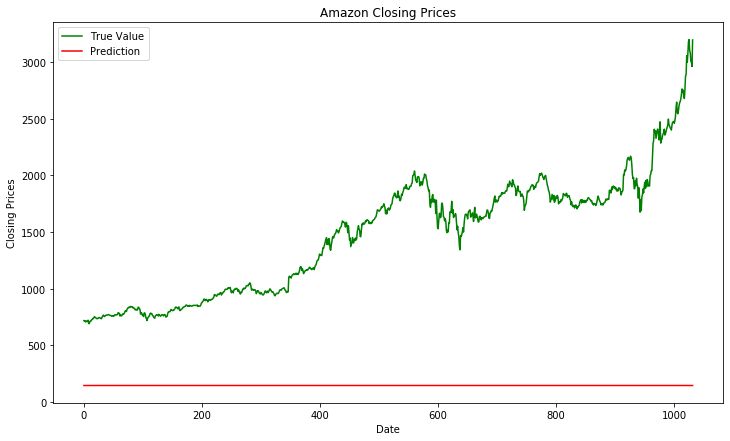

In [248]:
plt.figure(figsize=(12,7))
plt.title('Amazon Closing Prices')
plt.ylabel('Closing Prices')
plt.xlabel('Date')
plt.plot(y_test.values, 'green', label='True Value')
plt.plot(mpred2, 'red', label='Prediction')
plt.legend()

### Version 3

In [249]:
epochs = 4000
batch = 512
lr = 0.01

In [250]:
mlp = keras.Sequential()
mlp.add(keras.layers.Dense(32, activation='sigmoid', input_dim=X_train.shape[1]))
mlp.add(keras.layers.Dense(1))
mlp.compile(loss='mse', optimizer=keras.optimizers.Adam(lr))
mlp.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 32)                192       
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 33        
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [251]:
mfit = mlp.fit(X_train.values, y_train.values, epochs=epochs, verbose=2)

Train on 4124 samples
Epoch 1/4000
4124/4124 - 1s - loss: 42810.4794
Epoch 2/4000
4124/4124 - 0s - loss: 38035.3677
Epoch 3/4000
4124/4124 - 0s - loss: 34251.8244
Epoch 4/4000
4124/4124 - 0s - loss: 31329.2703
Epoch 5/4000
4124/4124 - 0s - loss: 29133.6955
Epoch 6/4000
4124/4124 - 0s - loss: 27531.8601
Epoch 7/4000
4124/4124 - 0s - loss: 26393.1668
Epoch 8/4000
4124/4124 - 0s - loss: 25613.4090
Epoch 9/4000
4124/4124 - 0s - loss: 25098.9256
Epoch 10/4000
4124/4124 - 0s - loss: 24769.5543
Epoch 11/4000
4124/4124 - 0s - loss: 24567.7066
Epoch 12/4000
4124/4124 - 0s - loss: 24453.2888
Epoch 13/4000
4124/4124 - 0s - loss: 24389.0523
Epoch 14/4000
4124/4124 - 0s - loss: 24354.4500
Epoch 15/4000
4124/4124 - 0s - loss: 24337.0016
Epoch 16/4000
4124/4124 - 0s - loss: 24328.1130
Epoch 17/4000
4124/4124 - 0s - loss: 24325.7611
Epoch 18/4000
4124/4124 - 0s - loss: 24323.0104
Epoch 19/4000
4124/4124 - 0s - loss: 24322.6940
Epoch 20/4000
4124/4124 - 0s - loss: 24324.4179
Epoch 21/4000
4124/4124 - 0

Epoch 170/4000
4124/4124 - 0s - loss: 24322.2531
Epoch 171/4000
4124/4124 - 0s - loss: 24323.4925
Epoch 172/4000
4124/4124 - 0s - loss: 24322.3738
Epoch 173/4000
4124/4124 - 0s - loss: 24322.8335
Epoch 174/4000
4124/4124 - 0s - loss: 24323.4689
Epoch 175/4000
4124/4124 - 0s - loss: 24322.8044
Epoch 176/4000
4124/4124 - 0s - loss: 24322.9419
Epoch 177/4000
4124/4124 - 0s - loss: 24325.0249
Epoch 178/4000
4124/4124 - 0s - loss: 24322.5826
Epoch 179/4000
4124/4124 - 0s - loss: 24323.2090
Epoch 180/4000
4124/4124 - 0s - loss: 24323.0052
Epoch 181/4000
4124/4124 - 0s - loss: 24323.2812
Epoch 182/4000
4124/4124 - 0s - loss: 24324.1527
Epoch 183/4000
4124/4124 - 0s - loss: 24323.9658
Epoch 184/4000
4124/4124 - 0s - loss: 24324.0210
Epoch 185/4000
4124/4124 - 0s - loss: 24323.9771
Epoch 186/4000
4124/4124 - 0s - loss: 24324.6465
Epoch 187/4000
4124/4124 - 0s - loss: 24325.9767
Epoch 188/4000
4124/4124 - 0s - loss: 24324.7454
Epoch 189/4000
4124/4124 - 0s - loss: 24325.0655
Epoch 190/4000
4124/

4124/4124 - 0s - loss: 24323.9266
Epoch 338/4000
4124/4124 - 0s - loss: 24323.6756
Epoch 339/4000
4124/4124 - 0s - loss: 24325.0479
Epoch 340/4000
4124/4124 - 0s - loss: 24324.3229
Epoch 341/4000
4124/4124 - 0s - loss: 24322.6274
Epoch 342/4000
4124/4124 - 0s - loss: 24323.0094
Epoch 343/4000
4124/4124 - 0s - loss: 24322.1912
Epoch 344/4000
4124/4124 - 0s - loss: 24325.8817
Epoch 345/4000
4124/4124 - 0s - loss: 24322.6704
Epoch 346/4000
4124/4124 - 0s - loss: 24323.8806
Epoch 347/4000
4124/4124 - 0s - loss: 24324.8590
Epoch 348/4000
4124/4124 - 0s - loss: 24322.8264
Epoch 349/4000
4124/4124 - 0s - loss: 24324.0096
Epoch 350/4000
4124/4124 - 0s - loss: 24322.8044
Epoch 351/4000
4124/4124 - 0s - loss: 24324.9371
Epoch 352/4000
4124/4124 - 0s - loss: 24323.1583
Epoch 353/4000
4124/4124 - 0s - loss: 24325.2999
Epoch 354/4000
4124/4124 - 0s - loss: 24323.9724
Epoch 355/4000
4124/4124 - 0s - loss: 24324.9720
Epoch 356/4000
4124/4124 - 0s - loss: 24325.9647
Epoch 357/4000
4124/4124 - 0s - los

Epoch 505/4000
4124/4124 - 0s - loss: 24324.0205
Epoch 506/4000
4124/4124 - 0s - loss: 24323.9089
Epoch 507/4000
4124/4124 - 0s - loss: 24324.9126
Epoch 508/4000
4124/4124 - 0s - loss: 24322.9785
Epoch 509/4000
4124/4124 - 0s - loss: 24321.9868
Epoch 510/4000
4124/4124 - 0s - loss: 24325.4318
Epoch 511/4000
4124/4124 - 0s - loss: 24323.9503
Epoch 512/4000
4124/4124 - 0s - loss: 24323.4159
Epoch 513/4000
4124/4124 - 0s - loss: 24323.8508
Epoch 514/4000
4124/4124 - 0s - loss: 24324.7707
Epoch 515/4000
4124/4124 - 0s - loss: 24324.4419
Epoch 516/4000
4124/4124 - 0s - loss: 24322.5759
Epoch 517/4000
4124/4124 - 0s - loss: 24323.4212
Epoch 518/4000
4124/4124 - 0s - loss: 24324.6137
Epoch 519/4000
4124/4124 - 0s - loss: 24326.1790
Epoch 520/4000
4124/4124 - 0s - loss: 24323.4177
Epoch 521/4000
4124/4124 - 0s - loss: 24325.2566
Epoch 522/4000
4124/4124 - 0s - loss: 24325.3981
Epoch 523/4000
4124/4124 - 0s - loss: 24325.5952
Epoch 524/4000
4124/4124 - 0s - loss: 24322.2297
Epoch 525/4000
4124/

4124/4124 - 0s - loss: 24322.9785
Epoch 673/4000
4124/4124 - 0s - loss: 24323.6562
Epoch 674/4000
4124/4124 - 0s - loss: 24324.3928
Epoch 675/4000
4124/4124 - 0s - loss: 24323.7873
Epoch 676/4000
4124/4124 - 0s - loss: 24324.4597
Epoch 677/4000
4124/4124 - 0s - loss: 24326.5900
Epoch 678/4000
4124/4124 - 0s - loss: 24324.1258
Epoch 679/4000
4124/4124 - 0s - loss: 24323.2907
Epoch 680/4000
4124/4124 - 0s - loss: 24324.9498
Epoch 681/4000
4124/4124 - 0s - loss: 24322.0124
Epoch 682/4000
4124/4124 - 0s - loss: 24322.5454
Epoch 683/4000
4124/4124 - 0s - loss: 24325.7335
Epoch 684/4000
4124/4124 - 0s - loss: 24328.5268
Epoch 685/4000
4124/4124 - 0s - loss: 24321.8807
Epoch 686/4000
4124/4124 - 0s - loss: 24322.5659
Epoch 687/4000
4124/4124 - 0s - loss: 24323.2435
Epoch 688/4000
4124/4124 - 0s - loss: 24323.9468
Epoch 689/4000
4124/4124 - 0s - loss: 24324.7606
Epoch 690/4000
4124/4124 - 0s - loss: 24322.8396
Epoch 691/4000
4124/4124 - 0s - loss: 24324.0834
Epoch 692/4000
4124/4124 - 0s - los

Epoch 840/4000
4124/4124 - 0s - loss: 24323.6375
Epoch 841/4000
4124/4124 - 0s - loss: 24324.9566
Epoch 842/4000
4124/4124 - 0s - loss: 24322.3281
Epoch 843/4000
4124/4124 - 0s - loss: 24322.7098
Epoch 844/4000
4124/4124 - 0s - loss: 24323.5814
Epoch 845/4000
4124/4124 - 0s - loss: 24323.8455
Epoch 846/4000
4124/4124 - 0s - loss: 24324.5222
Epoch 847/4000
4124/4124 - 0s - loss: 24323.2136
Epoch 848/4000
4124/4124 - 0s - loss: 24325.2103
Epoch 849/4000
4124/4124 - 0s - loss: 24322.8172
Epoch 850/4000
4124/4124 - 0s - loss: 24324.0855
Epoch 851/4000
4124/4124 - 0s - loss: 24322.9340
Epoch 852/4000
4124/4124 - 0s - loss: 24321.7970
Epoch 853/4000
4124/4124 - 0s - loss: 24322.8872
Epoch 854/4000
4124/4124 - 0s - loss: 24323.2891
Epoch 855/4000
4124/4124 - 0s - loss: 24324.1200
Epoch 856/4000
4124/4124 - 0s - loss: 24324.4561
Epoch 857/4000
4124/4124 - 0s - loss: 24322.3847
Epoch 858/4000
4124/4124 - 0s - loss: 24324.1417
Epoch 859/4000
4124/4124 - 0s - loss: 24322.8331
Epoch 860/4000
4124/

4124/4124 - 0s - loss: 24327.2165
Epoch 1008/4000
4124/4124 - 0s - loss: 24324.5049
Epoch 1009/4000
4124/4124 - 0s - loss: 24326.0922
Epoch 1010/4000
4124/4124 - 0s - loss: 24325.1273
Epoch 1011/4000
4124/4124 - 0s - loss: 24321.8928
Epoch 1012/4000
4124/4124 - 0s - loss: 24324.7839
Epoch 1013/4000
4124/4124 - 0s - loss: 24323.3779
Epoch 1014/4000
4124/4124 - 0s - loss: 24323.9836
Epoch 1015/4000
4124/4124 - 0s - loss: 24323.5922
Epoch 1016/4000
4124/4124 - 0s - loss: 24325.5857
Epoch 1017/4000
4124/4124 - 0s - loss: 24323.6444
Epoch 1018/4000
4124/4124 - 0s - loss: 24325.2490
Epoch 1019/4000
4124/4124 - 0s - loss: 24324.8961
Epoch 1020/4000
4124/4124 - 0s - loss: 24322.2901
Epoch 1021/4000
4124/4124 - 0s - loss: 24325.0630
Epoch 1022/4000
4124/4124 - 0s - loss: 24325.1347
Epoch 1023/4000
4124/4124 - 0s - loss: 24322.5990
Epoch 1024/4000
4124/4124 - 0s - loss: 24321.3849
Epoch 1025/4000
4124/4124 - 0s - loss: 24323.2623
Epoch 1026/4000
4124/4124 - 0s - loss: 24324.4133
Epoch 1027/4000


4124/4124 - 0s - loss: 24324.5825
Epoch 1172/4000
4124/4124 - 0s - loss: 24325.0733
Epoch 1173/4000
4124/4124 - 0s - loss: 24324.2510
Epoch 1174/4000
4124/4124 - 0s - loss: 24323.0437
Epoch 1175/4000
4124/4124 - 0s - loss: 24324.3329
Epoch 1176/4000
4124/4124 - 0s - loss: 24324.4146
Epoch 1177/4000
4124/4124 - 0s - loss: 24322.5607
Epoch 1178/4000
4124/4124 - 0s - loss: 24323.6027
Epoch 1179/4000
4124/4124 - 0s - loss: 24322.9554
Epoch 1180/4000
4124/4124 - 0s - loss: 24324.3562
Epoch 1181/4000
4124/4124 - 0s - loss: 24322.9813
Epoch 1182/4000
4124/4124 - 0s - loss: 24324.9416
Epoch 1183/4000
4124/4124 - 0s - loss: 24325.4844
Epoch 1184/4000
4124/4124 - 0s - loss: 24326.1122
Epoch 1185/4000
4124/4124 - 0s - loss: 24322.2768
Epoch 1186/4000
4124/4124 - 0s - loss: 24323.4694
Epoch 1187/4000
4124/4124 - 0s - loss: 24324.2929
Epoch 1188/4000
4124/4124 - 0s - loss: 24325.0905
Epoch 1189/4000
4124/4124 - 0s - loss: 24322.7999
Epoch 1190/4000
4124/4124 - 0s - loss: 24322.4605
Epoch 1191/4000


4124/4124 - 0s - loss: 24327.9939
Epoch 1336/4000
4124/4124 - 0s - loss: 24323.9706
Epoch 1337/4000
4124/4124 - 0s - loss: 24323.5268
Epoch 1338/4000
4124/4124 - 0s - loss: 24324.5109
Epoch 1339/4000
4124/4124 - 0s - loss: 24324.5923
Epoch 1340/4000
4124/4124 - 0s - loss: 24324.3433
Epoch 1341/4000
4124/4124 - 0s - loss: 24325.3126
Epoch 1342/4000
4124/4124 - 0s - loss: 24323.6024
Epoch 1343/4000
4124/4124 - 0s - loss: 24322.4657
Epoch 1344/4000
4124/4124 - 0s - loss: 24323.2696
Epoch 1345/4000
4124/4124 - 0s - loss: 24323.8186
Epoch 1346/4000
4124/4124 - 0s - loss: 24327.5454
Epoch 1347/4000
4124/4124 - 0s - loss: 24324.6056
Epoch 1348/4000
4124/4124 - 0s - loss: 24323.6505
Epoch 1349/4000
4124/4124 - 0s - loss: 24323.9919
Epoch 1350/4000
4124/4124 - 0s - loss: 24325.3409
Epoch 1351/4000
4124/4124 - 0s - loss: 24322.5840
Epoch 1352/4000
4124/4124 - 0s - loss: 24323.4193
Epoch 1353/4000
4124/4124 - 0s - loss: 24325.2830
Epoch 1354/4000
4124/4124 - 0s - loss: 24322.5317
Epoch 1355/4000


4124/4124 - 0s - loss: 24323.8540
Epoch 1500/4000
4124/4124 - 0s - loss: 24326.1690
Epoch 1501/4000
4124/4124 - 0s - loss: 24322.6034
Epoch 1502/4000
4124/4124 - 0s - loss: 24323.0894
Epoch 1503/4000
4124/4124 - 0s - loss: 24325.5714
Epoch 1504/4000
4124/4124 - 0s - loss: 24323.5579
Epoch 1505/4000
4124/4124 - 0s - loss: 24323.5133
Epoch 1506/4000
4124/4124 - 0s - loss: 24323.7764
Epoch 1507/4000
4124/4124 - 0s - loss: 24324.9503
Epoch 1508/4000
4124/4124 - 0s - loss: 24325.1067
Epoch 1509/4000
4124/4124 - 0s - loss: 24325.0346
Epoch 1510/4000
4124/4124 - 0s - loss: 24323.9214
Epoch 1511/4000
4124/4124 - 0s - loss: 24323.6652
Epoch 1512/4000
4124/4124 - 0s - loss: 24324.9397
Epoch 1513/4000
4124/4124 - 0s - loss: 24324.0830
Epoch 1514/4000
4124/4124 - 0s - loss: 24325.2802
Epoch 1515/4000
4124/4124 - 0s - loss: 24326.2278
Epoch 1516/4000
4124/4124 - 0s - loss: 24324.9225
Epoch 1517/4000
4124/4124 - 0s - loss: 24324.4380
Epoch 1518/4000
4124/4124 - 0s - loss: 24323.6909
Epoch 1519/4000


4124/4124 - 0s - loss: 24323.4620
Epoch 1664/4000
4124/4124 - 0s - loss: 24324.5409
Epoch 1665/4000
4124/4124 - 0s - loss: 24323.5048
Epoch 1666/4000
4124/4124 - 0s - loss: 24323.5331
Epoch 1667/4000
4124/4124 - 0s - loss: 24326.2998
Epoch 1668/4000
4124/4124 - 0s - loss: 24323.4188
Epoch 1669/4000
4124/4124 - 0s - loss: 24325.1420
Epoch 1670/4000
4124/4124 - 0s - loss: 24323.3728
Epoch 1671/4000
4124/4124 - 0s - loss: 24323.5113
Epoch 1672/4000
4124/4124 - 0s - loss: 24323.8494
Epoch 1673/4000
4124/4124 - 0s - loss: 24322.8806
Epoch 1674/4000
4124/4124 - 0s - loss: 24323.3282
Epoch 1675/4000
4124/4124 - 0s - loss: 24323.9317
Epoch 1676/4000
4124/4124 - 0s - loss: 24324.0769
Epoch 1677/4000
4124/4124 - 0s - loss: 24323.1908
Epoch 1678/4000
4124/4124 - 0s - loss: 24329.1345
Epoch 1679/4000
4124/4124 - 0s - loss: 24322.9431
Epoch 1680/4000
4124/4124 - 0s - loss: 24323.9871
Epoch 1681/4000
4124/4124 - 0s - loss: 24325.1975
Epoch 1682/4000
4124/4124 - 0s - loss: 24321.9367
Epoch 1683/4000


4124/4124 - 0s - loss: 24323.4951
Epoch 1828/4000
4124/4124 - 0s - loss: 24323.7588
Epoch 1829/4000
4124/4124 - 0s - loss: 24324.7471
Epoch 1830/4000
4124/4124 - 0s - loss: 24325.0595
Epoch 1831/4000
4124/4124 - 0s - loss: 24323.3518
Epoch 1832/4000
4124/4124 - 0s - loss: 24324.7075
Epoch 1833/4000
4124/4124 - 0s - loss: 24323.0596
Epoch 1834/4000
4124/4124 - 0s - loss: 24323.9980
Epoch 1835/4000
4124/4124 - 0s - loss: 24323.6490
Epoch 1836/4000
4124/4124 - 0s - loss: 24322.9648
Epoch 1837/4000
4124/4124 - 0s - loss: 24324.5397
Epoch 1838/4000
4124/4124 - 0s - loss: 24322.4727
Epoch 1839/4000
4124/4124 - 0s - loss: 24322.9544
Epoch 1840/4000
4124/4124 - 0s - loss: 24324.4780
Epoch 1841/4000
4124/4124 - 0s - loss: 24324.4467
Epoch 1842/4000
4124/4124 - 0s - loss: 24322.7745
Epoch 1843/4000
4124/4124 - 0s - loss: 24325.2846
Epoch 1844/4000
4124/4124 - 0s - loss: 24323.3592
Epoch 1845/4000
4124/4124 - 0s - loss: 24322.9783
Epoch 1846/4000
4124/4124 - 0s - loss: 24325.0552
Epoch 1847/4000


4124/4124 - 0s - loss: 24323.9277
Epoch 1992/4000
4124/4124 - 0s - loss: 24324.2085
Epoch 1993/4000
4124/4124 - 0s - loss: 24325.1813
Epoch 1994/4000
4124/4124 - 0s - loss: 24323.7776
Epoch 1995/4000
4124/4124 - 0s - loss: 24323.1109
Epoch 1996/4000
4124/4124 - 0s - loss: 24323.4709
Epoch 1997/4000
4124/4124 - 0s - loss: 24324.6003
Epoch 1998/4000
4124/4124 - 0s - loss: 24322.4857
Epoch 1999/4000
4124/4124 - 0s - loss: 24325.3246
Epoch 2000/4000
4124/4124 - 0s - loss: 24324.0001
Epoch 2001/4000
4124/4124 - 0s - loss: 24322.1834
Epoch 2002/4000
4124/4124 - 0s - loss: 24324.2802
Epoch 2003/4000
4124/4124 - 0s - loss: 24326.1994
Epoch 2004/4000
4124/4124 - 0s - loss: 24325.4817
Epoch 2005/4000
4124/4124 - 0s - loss: 24324.8977
Epoch 2006/4000
4124/4124 - 0s - loss: 24323.3718
Epoch 2007/4000
4124/4124 - 0s - loss: 24324.3763
Epoch 2008/4000
4124/4124 - 0s - loss: 24323.2997
Epoch 2009/4000
4124/4124 - 0s - loss: 24324.3494
Epoch 2010/4000
4124/4124 - 0s - loss: 24326.1552
Epoch 2011/4000


4124/4124 - 0s - loss: 24323.4044
Epoch 2156/4000
4124/4124 - 0s - loss: 24323.9632
Epoch 2157/4000
4124/4124 - 0s - loss: 24323.1269
Epoch 2158/4000
4124/4124 - 0s - loss: 24324.5288
Epoch 2159/4000
4124/4124 - 0s - loss: 24322.7939
Epoch 2160/4000
4124/4124 - 0s - loss: 24324.2059
Epoch 2161/4000
4124/4124 - 0s - loss: 24322.9430
Epoch 2162/4000
4124/4124 - 0s - loss: 24325.2039
Epoch 2163/4000
4124/4124 - 0s - loss: 24330.5580
Epoch 2164/4000
4124/4124 - 0s - loss: 24323.4608
Epoch 2165/4000
4124/4124 - 0s - loss: 24323.9957
Epoch 2166/4000
4124/4124 - 0s - loss: 24324.1030
Epoch 2167/4000
4124/4124 - 0s - loss: 24322.2938
Epoch 2168/4000
4124/4124 - 0s - loss: 24322.7121
Epoch 2169/4000
4124/4124 - 0s - loss: 24323.7463
Epoch 2170/4000
4124/4124 - 0s - loss: 24323.0424
Epoch 2171/4000
4124/4124 - 0s - loss: 24324.8034
Epoch 2172/4000
4124/4124 - 0s - loss: 24322.3926
Epoch 2173/4000
4124/4124 - 0s - loss: 24324.5760
Epoch 2174/4000
4124/4124 - 0s - loss: 24324.7967
Epoch 2175/4000


4124/4124 - 0s - loss: 24323.2602
Epoch 2320/4000
4124/4124 - 0s - loss: 24323.9989
Epoch 2321/4000
4124/4124 - 0s - loss: 24322.7352
Epoch 2322/4000
4124/4124 - 0s - loss: 24323.0520
Epoch 2323/4000
4124/4124 - 0s - loss: 24326.1436
Epoch 2324/4000
4124/4124 - 0s - loss: 24322.7569
Epoch 2325/4000
4124/4124 - 0s - loss: 24325.2655
Epoch 2326/4000
4124/4124 - 0s - loss: 24324.7480
Epoch 2327/4000
4124/4124 - 0s - loss: 24324.0473
Epoch 2328/4000
4124/4124 - 0s - loss: 24324.4823
Epoch 2329/4000
4124/4124 - 0s - loss: 24324.7064
Epoch 2330/4000
4124/4124 - 0s - loss: 24324.2652
Epoch 2331/4000
4124/4124 - 0s - loss: 24324.0475
Epoch 2332/4000
4124/4124 - 0s - loss: 24324.7192
Epoch 2333/4000
4124/4124 - 0s - loss: 24322.6880
Epoch 2334/4000
4124/4124 - 0s - loss: 24323.4906
Epoch 2335/4000
4124/4124 - 0s - loss: 24323.2927
Epoch 2336/4000
4124/4124 - 0s - loss: 24324.3916
Epoch 2337/4000
4124/4124 - 0s - loss: 24327.7658
Epoch 2338/4000
4124/4124 - 0s - loss: 24323.4404
Epoch 2339/4000


4124/4124 - 0s - loss: 24323.2453
Epoch 2484/4000
4124/4124 - 0s - loss: 24323.8924
Epoch 2485/4000
4124/4124 - 0s - loss: 24323.2601
Epoch 2486/4000
4124/4124 - 0s - loss: 24328.9360
Epoch 2487/4000
4124/4124 - 0s - loss: 24323.2462
Epoch 2488/4000
4124/4124 - 0s - loss: 24324.9351
Epoch 2489/4000
4124/4124 - 0s - loss: 24323.4524
Epoch 2490/4000
4124/4124 - 0s - loss: 24323.7032
Epoch 2491/4000
4124/4124 - 0s - loss: 24325.1536
Epoch 2492/4000
4124/4124 - 0s - loss: 24322.5552
Epoch 2493/4000
4124/4124 - 0s - loss: 24323.7078
Epoch 2494/4000
4124/4124 - 0s - loss: 24323.4648
Epoch 2495/4000
4124/4124 - 0s - loss: 24322.3042
Epoch 2496/4000
4124/4124 - 0s - loss: 24324.9090
Epoch 2497/4000
4124/4124 - 0s - loss: 24324.7286
Epoch 2498/4000
4124/4124 - 0s - loss: 24324.2446
Epoch 2499/4000
4124/4124 - 0s - loss: 24323.0196
Epoch 2500/4000
4124/4124 - 0s - loss: 24323.1379
Epoch 2501/4000
4124/4124 - 0s - loss: 24326.1279
Epoch 2502/4000
4124/4124 - 0s - loss: 24323.2635
Epoch 2503/4000


4124/4124 - 0s - loss: 24324.2750
Epoch 2648/4000
4124/4124 - 0s - loss: 24323.5402
Epoch 2649/4000
4124/4124 - 0s - loss: 24322.6622
Epoch 2650/4000
4124/4124 - 0s - loss: 24322.3920
Epoch 2651/4000
4124/4124 - 0s - loss: 24324.8052
Epoch 2652/4000
4124/4124 - 0s - loss: 24323.8818
Epoch 2653/4000
4124/4124 - 0s - loss: 24323.5333
Epoch 2654/4000
4124/4124 - 0s - loss: 24322.9667
Epoch 2655/4000
4124/4124 - 0s - loss: 24322.9071
Epoch 2656/4000
4124/4124 - 0s - loss: 24323.1763
Epoch 2657/4000
4124/4124 - 0s - loss: 24324.0157
Epoch 2658/4000
4124/4124 - 0s - loss: 24323.5079
Epoch 2659/4000
4124/4124 - 0s - loss: 24322.8710
Epoch 2660/4000
4124/4124 - 0s - loss: 24323.6863
Epoch 2661/4000
4124/4124 - 0s - loss: 24324.0276
Epoch 2662/4000
4124/4124 - 0s - loss: 24323.0948
Epoch 2663/4000
4124/4124 - 0s - loss: 24323.4604
Epoch 2664/4000
4124/4124 - 0s - loss: 24323.0363
Epoch 2665/4000
4124/4124 - 0s - loss: 24325.2597
Epoch 2666/4000
4124/4124 - 0s - loss: 24327.3111
Epoch 2667/4000


4124/4124 - 0s - loss: 24326.3706
Epoch 2812/4000
4124/4124 - 0s - loss: 24325.2164
Epoch 2813/4000
4124/4124 - 0s - loss: 24325.9342
Epoch 2814/4000
4124/4124 - 0s - loss: 24323.5281
Epoch 2815/4000
4124/4124 - 0s - loss: 24322.6477
Epoch 2816/4000
4124/4124 - 0s - loss: 24323.7822
Epoch 2817/4000
4124/4124 - 0s - loss: 24323.9022
Epoch 2818/4000
4124/4124 - 0s - loss: 24325.3082
Epoch 2819/4000
4124/4124 - 0s - loss: 24324.4248
Epoch 2820/4000
4124/4124 - 0s - loss: 24322.3030
Epoch 2821/4000
4124/4124 - 0s - loss: 24322.8028
Epoch 2822/4000
4124/4124 - 0s - loss: 24322.4609
Epoch 2823/4000
4124/4124 - 0s - loss: 24323.3179
Epoch 2824/4000
4124/4124 - 0s - loss: 24326.5098
Epoch 2825/4000
4124/4124 - 0s - loss: 24328.1184
Epoch 2826/4000
4124/4124 - 0s - loss: 24323.5193
Epoch 2827/4000
4124/4124 - 0s - loss: 24324.2265
Epoch 2828/4000
4124/4124 - 0s - loss: 24322.5706
Epoch 2829/4000
4124/4124 - 0s - loss: 24322.7290
Epoch 2830/4000
4124/4124 - 0s - loss: 24323.8762
Epoch 2831/4000


4124/4124 - 0s - loss: 24325.9260
Epoch 2976/4000
4124/4124 - 0s - loss: 24324.0514
Epoch 2977/4000
4124/4124 - 0s - loss: 24323.5174
Epoch 2978/4000
4124/4124 - 0s - loss: 24324.1358
Epoch 2979/4000
4124/4124 - 0s - loss: 24324.0971
Epoch 2980/4000
4124/4124 - 0s - loss: 24322.6620
Epoch 2981/4000
4124/4124 - 0s - loss: 24323.4260
Epoch 2982/4000
4124/4124 - 0s - loss: 24325.1495
Epoch 2983/4000
4124/4124 - 0s - loss: 24324.1070
Epoch 2984/4000
4124/4124 - 0s - loss: 24323.5728
Epoch 2985/4000
4124/4124 - 0s - loss: 24323.9374
Epoch 2986/4000
4124/4124 - 0s - loss: 24323.6285
Epoch 2987/4000
4124/4124 - 0s - loss: 24324.5334
Epoch 2988/4000
4124/4124 - 0s - loss: 24327.0719
Epoch 2989/4000
4124/4124 - 0s - loss: 24325.0908
Epoch 2990/4000
4124/4124 - 0s - loss: 24322.6486
Epoch 2991/4000
4124/4124 - 0s - loss: 24323.6358
Epoch 2992/4000
4124/4124 - 0s - loss: 24324.1612
Epoch 2993/4000
4124/4124 - 0s - loss: 24322.0079
Epoch 2994/4000
4124/4124 - 0s - loss: 24322.0892
Epoch 2995/4000


4124/4124 - 0s - loss: 24325.8852
Epoch 3140/4000
4124/4124 - 0s - loss: 24326.5833
Epoch 3141/4000
4124/4124 - 0s - loss: 24323.9510
Epoch 3142/4000
4124/4124 - 0s - loss: 24324.0440
Epoch 3143/4000
4124/4124 - 0s - loss: 24323.1082
Epoch 3144/4000
4124/4124 - 0s - loss: 24324.6832
Epoch 3145/4000
4124/4124 - 0s - loss: 24323.2871
Epoch 3146/4000
4124/4124 - 0s - loss: 24324.6325
Epoch 3147/4000
4124/4124 - 0s - loss: 24326.9675
Epoch 3148/4000
4124/4124 - 0s - loss: 24323.5465
Epoch 3149/4000
4124/4124 - 0s - loss: 24325.6645
Epoch 3150/4000
4124/4124 - 0s - loss: 24322.3860
Epoch 3151/4000
4124/4124 - 0s - loss: 24323.2995
Epoch 3152/4000
4124/4124 - 0s - loss: 24322.5627
Epoch 3153/4000
4124/4124 - 0s - loss: 24323.4806
Epoch 3154/4000
4124/4124 - 0s - loss: 24322.8633
Epoch 3155/4000
4124/4124 - 0s - loss: 24322.3905
Epoch 3156/4000
4124/4124 - 0s - loss: 24323.2573
Epoch 3157/4000
4124/4124 - 0s - loss: 24322.6562
Epoch 3158/4000
4124/4124 - 0s - loss: 24324.8449
Epoch 3159/4000


4124/4124 - 0s - loss: 24325.1427
Epoch 3304/4000
4124/4124 - 0s - loss: 24322.1583
Epoch 3305/4000
4124/4124 - 0s - loss: 24323.8006
Epoch 3306/4000
4124/4124 - 0s - loss: 24324.0084
Epoch 3307/4000
4124/4124 - 0s - loss: 24322.2103
Epoch 3308/4000
4124/4124 - 0s - loss: 24325.7047
Epoch 3309/4000
4124/4124 - 0s - loss: 24323.4348
Epoch 3310/4000
4124/4124 - 0s - loss: 24322.6838
Epoch 3311/4000
4124/4124 - 0s - loss: 24324.0883
Epoch 3312/4000
4124/4124 - 0s - loss: 24323.5385
Epoch 3313/4000
4124/4124 - 0s - loss: 24324.2396
Epoch 3314/4000
4124/4124 - 0s - loss: 24322.8016
Epoch 3315/4000
4124/4124 - 0s - loss: 24325.0998
Epoch 3316/4000
4124/4124 - 0s - loss: 24324.1692
Epoch 3317/4000
4124/4124 - 0s - loss: 24324.5657
Epoch 3318/4000
4124/4124 - 0s - loss: 24324.1103
Epoch 3319/4000
4124/4124 - 0s - loss: 24323.1284
Epoch 3320/4000
4124/4124 - 0s - loss: 24323.3750
Epoch 3321/4000
4124/4124 - 0s - loss: 24324.1561
Epoch 3322/4000
4124/4124 - 0s - loss: 24323.3839
Epoch 3323/4000


4124/4124 - 0s - loss: 24323.1461
Epoch 3468/4000
4124/4124 - 0s - loss: 24322.0364
Epoch 3469/4000
4124/4124 - 0s - loss: 24324.9631
Epoch 3470/4000
4124/4124 - 0s - loss: 24323.0207
Epoch 3471/4000
4124/4124 - 0s - loss: 24322.6540
Epoch 3472/4000
4124/4124 - 0s - loss: 24322.5232
Epoch 3473/4000
4124/4124 - 0s - loss: 24323.0898
Epoch 3474/4000
4124/4124 - 0s - loss: 24323.0683
Epoch 3475/4000
4124/4124 - 0s - loss: 24323.3609
Epoch 3476/4000
4124/4124 - 0s - loss: 24322.7932
Epoch 3477/4000
4124/4124 - 0s - loss: 24323.7978
Epoch 3478/4000
4124/4124 - 0s - loss: 24324.9991
Epoch 3479/4000
4124/4124 - 0s - loss: 24323.2750
Epoch 3480/4000
4124/4124 - 0s - loss: 24324.6582
Epoch 3481/4000
4124/4124 - 0s - loss: 24324.8704
Epoch 3482/4000
4124/4124 - 0s - loss: 24322.4082
Epoch 3483/4000
4124/4124 - 0s - loss: 24325.6947
Epoch 3484/4000
4124/4124 - 0s - loss: 24324.3445
Epoch 3485/4000
4124/4124 - 0s - loss: 24322.7969
Epoch 3486/4000
4124/4124 - 0s - loss: 24324.6991
Epoch 3487/4000


4124/4124 - 0s - loss: 24324.5322
Epoch 3632/4000
4124/4124 - 0s - loss: 24322.5345
Epoch 3633/4000
4124/4124 - 0s - loss: 24324.2452
Epoch 3634/4000
4124/4124 - 0s - loss: 24323.9627
Epoch 3635/4000
4124/4124 - 0s - loss: 24325.4080
Epoch 3636/4000
4124/4124 - 0s - loss: 24321.7657
Epoch 3637/4000
4124/4124 - 0s - loss: 24323.7485
Epoch 3638/4000
4124/4124 - 0s - loss: 24323.3919
Epoch 3639/4000
4124/4124 - 0s - loss: 24326.1168
Epoch 3640/4000
4124/4124 - 0s - loss: 24325.3564
Epoch 3641/4000
4124/4124 - 0s - loss: 24323.1489
Epoch 3642/4000
4124/4124 - 0s - loss: 24324.0991
Epoch 3643/4000
4124/4124 - 0s - loss: 24323.5530
Epoch 3644/4000
4124/4124 - 0s - loss: 24324.5126
Epoch 3645/4000
4124/4124 - 0s - loss: 24323.9216
Epoch 3646/4000
4124/4124 - 0s - loss: 24325.4526
Epoch 3647/4000
4124/4124 - 0s - loss: 24324.5356
Epoch 3648/4000
4124/4124 - 0s - loss: 24322.2372
Epoch 3649/4000
4124/4124 - 0s - loss: 24324.8245
Epoch 3650/4000
4124/4124 - 0s - loss: 24327.1421
Epoch 3651/4000


4124/4124 - 0s - loss: 24324.5682
Epoch 3796/4000
4124/4124 - 0s - loss: 24322.8592
Epoch 3797/4000
4124/4124 - 0s - loss: 24324.3848
Epoch 3798/4000
4124/4124 - 0s - loss: 24327.1144
Epoch 3799/4000
4124/4124 - 0s - loss: 24324.2495
Epoch 3800/4000
4124/4124 - 0s - loss: 24324.7075
Epoch 3801/4000
4124/4124 - 0s - loss: 24326.9451
Epoch 3802/4000
4124/4124 - 0s - loss: 24324.3990
Epoch 3803/4000
4124/4124 - 0s - loss: 24321.8894
Epoch 3804/4000
4124/4124 - 0s - loss: 24325.1342
Epoch 3805/4000
4124/4124 - 0s - loss: 24323.8840
Epoch 3806/4000
4124/4124 - 0s - loss: 24322.1305
Epoch 3807/4000
4124/4124 - 0s - loss: 24322.2934
Epoch 3808/4000
4124/4124 - 0s - loss: 24325.0435
Epoch 3809/4000
4124/4124 - 0s - loss: 24323.1796
Epoch 3810/4000
4124/4124 - 0s - loss: 24323.7255
Epoch 3811/4000
4124/4124 - 0s - loss: 24325.8496
Epoch 3812/4000
4124/4124 - 0s - loss: 24323.8584
Epoch 3813/4000
4124/4124 - 0s - loss: 24323.0078
Epoch 3814/4000
4124/4124 - 0s - loss: 24323.5297
Epoch 3815/4000


4124/4124 - 0s - loss: 24326.6484
Epoch 3960/4000
4124/4124 - 0s - loss: 24323.5491
Epoch 3961/4000
4124/4124 - 0s - loss: 24323.4277
Epoch 3962/4000
4124/4124 - 0s - loss: 24323.7577
Epoch 3963/4000
4124/4124 - 0s - loss: 24323.1786
Epoch 3964/4000
4124/4124 - 0s - loss: 24323.9437
Epoch 3965/4000
4124/4124 - 0s - loss: 24325.4332
Epoch 3966/4000
4124/4124 - 0s - loss: 24323.0749
Epoch 3967/4000
4124/4124 - 0s - loss: 24324.6504
Epoch 3968/4000
4124/4124 - 0s - loss: 24324.8556
Epoch 3969/4000
4124/4124 - 0s - loss: 24327.1394
Epoch 3970/4000
4124/4124 - 0s - loss: 24326.6269
Epoch 3971/4000
4124/4124 - 0s - loss: 24323.5322
Epoch 3972/4000
4124/4124 - 0s - loss: 24322.2975
Epoch 3973/4000
4124/4124 - 0s - loss: 24326.5889
Epoch 3974/4000
4124/4124 - 0s - loss: 24323.8103
Epoch 3975/4000
4124/4124 - 0s - loss: 24323.0351
Epoch 3976/4000
4124/4124 - 0s - loss: 24325.0244
Epoch 3977/4000
4124/4124 - 0s - loss: 24324.7362
Epoch 3978/4000
4124/4124 - 0s - loss: 24325.8851
Epoch 3979/4000


In [252]:
mpred3 = mlp.predict(X_test.values, verbose=0)

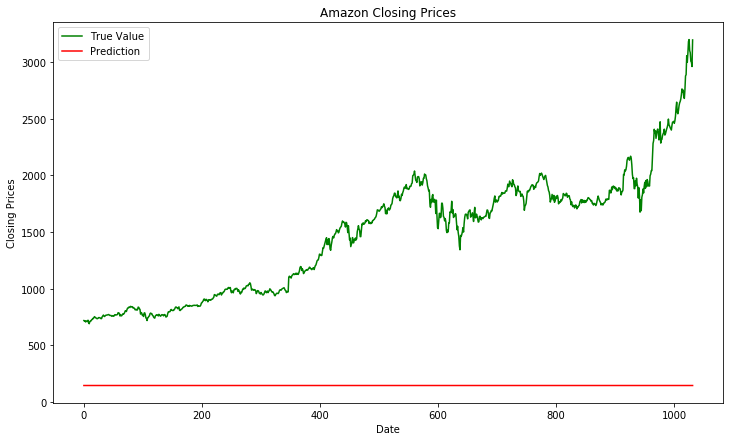

In [253]:
plt.figure(figsize=(12,7))
plt.title('Amazon Closing Prices')
plt.ylabel('Closing Prices')
plt.xlabel('Date')
plt.plot(y_test.values, 'green', label='True Value')
plt.plot(mpred3, 'red', label='Prediction')
plt.legend()

#### As we can see, the best performing MLP model is version 1. I believe this has alot to do with the activation function being used. Relu is one of the most popular activation functions because of how well it works with different problems. Sigmoid and Softmax both capped out. This was interesting to see but from researching, it is common due to. I also believe that learning rate and batch size played big factors. I believe that a batch size of 512 was too big and a batch size of 128 was too small so choosing something in between them made perfect sense.

### LSTM

In [254]:
lstm = keras.Sequential()
lstm.add(keras.layers.LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm.add(keras.layers.LSTM(50, activation='relu'))
lstm.add(keras.layers.Dense(1))
lstm.compile(optimizer='adam', loss='mse')

In [255]:

x_arr = X_train.to_numpy()
x_arr = x_arr.reshape(x_arr.shape[0], x_arr.shape[1],1)


y_arr = y_train.to_numpy()
y_arr = y_arr.reshape(y_arr.shape[0], 1)


In [256]:
lfit = lstm.fit(x_arr, y_arr, epochs=50, verbose=2)

Train on 4124 samples
Epoch 1/50
4124/4124 - 6s - loss: 1470149805.1389
Epoch 2/50
4124/4124 - 3s - loss: 25878803.5548
Epoch 3/50
4124/4124 - 3s - loss: 37734.3257
Epoch 4/50
4124/4124 - 3s - loss: 147514266.9624
Epoch 5/50
4124/4124 - 3s - loss: 212000.8776
Epoch 6/50
4124/4124 - 3s - loss: 34414.9238
Epoch 7/50
4124/4124 - 3s - loss: 34181.2674
Epoch 8/50
4124/4124 - 3s - loss: 34014.5376
Epoch 9/50
4124/4124 - 3s - loss: 33507.3812
Epoch 10/50
4124/4124 - 3s - loss: 33106.5738
Epoch 11/50
4124/4124 - 3s - loss: 32917.2056
Epoch 12/50
4124/4124 - 3s - loss: 32017.5313
Epoch 13/50
4124/4124 - 3s - loss: 31100.0661
Epoch 14/50
4124/4124 - 3s - loss: 30335.6928
Epoch 15/50
4124/4124 - 3s - loss: 42964.5508
Epoch 16/50
4124/4124 - 3s - loss: 27357.8148
Epoch 17/50
4124/4124 - 3s - loss: 247476.1349
Epoch 18/50
4124/4124 - 3s - loss: 38858.3861
Epoch 19/50
4124/4124 - 3s - loss: 932185.3302
Epoch 20/50
4124/4124 - 3s - loss: 18417.3827
Epoch 21/50
4124/4124 - 3s - loss: 2410.9875
Epoch 2

In [257]:

x_arr = X_test.to_numpy()
x_arr = x_arr.reshape(x_arr.shape[0], x_arr.shape[1],1)

lpred = lstm.predict(x_arr, verbose=0)

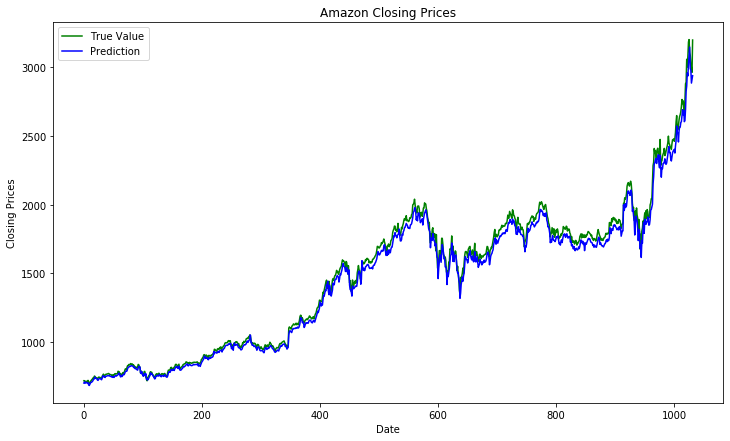

In [258]:
plt.figure(figsize=(12,7))
plt.title('Amazon Closing Prices')
plt.ylabel('Closing Prices')
plt.xlabel('Date')
plt.plot(y_test.values, 'green', label='True Value')
plt.plot(lpred, 'blue', label='Prediction')
plt.legend()

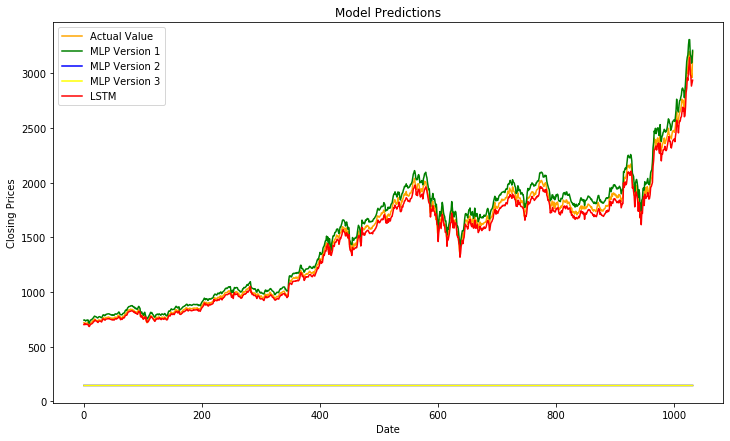

In [261]:
plt.figure(figsize=(12,7))
plt.title('Model Predictions')
plt.ylabel('Closing Prices')
plt.xlabel('Date')
plt.plot(y_test.values, 'orange', label='Actual Value')
plt.plot(mpred1, 'green', label='MLP Version 1')
plt.plot(mpred2, 'blue', label='MLP Version 2')
plt.plot(mpred3, 'yellow', label='MLP Version 3')
plt.plot(lpred, 'red', label='LSTM')
plt.legend()

#### As we can see, LSTM and MLP Version 1 are extremely accurate. In this case, we can't really say which one is better than the other but in theory, LSTM should be better than MLP overall. This is because of the memory feature of LSTM. 